# Methoden en Technieken -- Blok 2

## Datapunt 2b,

In deze opdracht worden de volgende leeruitkomsten getoetst, relevante termen zijn **dik** gedrukt:
- A2: Je stelt voor een AI-oplossing juridische, ethische, organisatorische, **functionele en
technische requirements** op.
- B1: Je **verkent en prepareert een dataset voor het trainen en testen van een AI-model** en
kan de voor- en nadelen van het gebruik van een bestaande dataset onderbouwen, rekening
houdend met technische en ethische randvoorwaarden.
- B2: Je **stelt op basis van requirements en data een geschikte architectuur voor een AI-
oplossing op en selecteert daarvoor passende AI-technieken gebruik makend van bijvoorbeeld machine learning, deep learning, kennisrepresentatie, computer vision** en natural language
processing.
- B3: Je **ontwikkelt een nieuw** of voorgetraind **AI-model volgens een iteratief en systematisch
proces**.
- C2: **Je evalueert en beoordeelt de kwaliteit van een AI-model aan de hand van kwaliteitscriteria die in het vakgebied erkend worden** zoals robustness, **performance**, scalability,
explainability, **model complexity** en resource demand.

Dit is een individuele opdracht. Het is toegestaan met elkaar de opdracht te bespreken, maar iedereen schrijft zijn eigen code en antwoorden. Mocht je code van het internet hebben overgenomen/aangepast, vermeld dan de bron in het commentaar. Het gebruik van generatieve AI (Chat-GPT, etc...) is *alleen* toegestaan bij de voorbereiding op de opdracht. Denk hierbj aan activiteiten zoals brainstormen, of het maken van een plan. Het is niet toegestaan code of tekst van generative AI over te nemen. (Level 2 van de AI Assessment Scale)

Als je gebruik maakt van bronnen om jouw keuzes te verantwoorden willen we bij deze opdracht het volgende zien:
- De bronverwijzing (online link indien beschikbaar)
- De uitspraak die jij doet
- Paragraafnummer uit de bron waar je deze uitspraak op baseert
- Een letterlijke quote uit de bron waar je jouw uitspraak op baseert

(Merk op: dit is veel uitgebreider dan wat er meestal in rapporten verwacht wordt, en is puur bedoeld te controleren of de student correct kan verwijzen.)

Voorbeeld:
> De laatste jaren zijn GANs veel minder populair als generatieve modellen [1] (H17: "(GANs) have gradually fallen out of fashion in recent years and have been all but replaced by diffusion models")
>
> ...
>
> Bronnenlijst:
>
> [1] F. Chollet and M. Watson, Deep Learning in Python, 3rd edition, Manning, 2025. 


## De opdracht

De volgende code laadt de data in. Dit is een gedeeltelijk gelabelde variant van de MNIST dataset

In [2]:
import pickle

with open('data_2b.pkl', 'rb') as file:
    x_labeled, y_labeled, x_unlabeled = pickle.load(file)

De opdracht is om een *semi-supervised* model te trainen dat deze data zo goed mogelijk (rekening houdend met tijd en beschikbare hardware) kan classificeren. De enige voorwaarde is dat dit model gebruik moet maken van een *variational auto encoder* die unsupervised getrained is op deze data. Zie onder andere lessen 11, 12 en 13 van M&T blok 2 voor inspiratie.

Je zult waarschijnlijk meerdere iteraties op beide het *unsupervised* (de VAE) gedeelte en het *supervised* gedeelte van je model doorlopen. Zorg dat deze iteraties duidelijk in je notebook beschreven staan, wis ze niet!

### Deel 1

Voer een data preparatie/verkenning uit, leg kort uit wat je opvalt. Stel op basis hiervan een korte lijst van *requirements* op waar je model aan moet voldoen.

#### Deel 1a. Data Verkenning Code

In [ ]:
#1a.1 Data Inladen 
import pickle

with open('data_2b.pkl', 'rb') as file:
    x_labeled, y_labeled, x_unlabeled = pickle.load(file)

In [276]:
#1a.2 Shape checken
x_labeled.shape, y_labeled.shape, x_unlabeled.shape

((250, 28, 28, 1), (250,), (69750, 28, 28, 1))

In [ ]:
#1a.3 Aantal unieke labels
import numpy as np
len(np.unique(y_labeled))

10

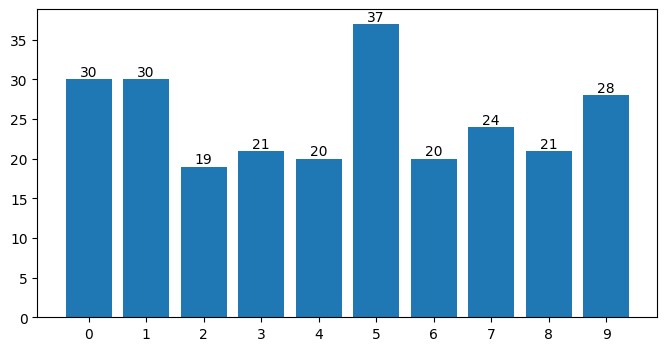

In [ ]:
#1a.4 class distribution plotten
import matplotlib.pyplot as plt
import numpy as np

classes, counts = np.unique(y_labeled, return_counts=True)

#fig
plt.figure(figsize=(8,4))
bars = plt.bar(classes, counts)
plt.xticks(classes)

# class counts op bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )

plt.show()


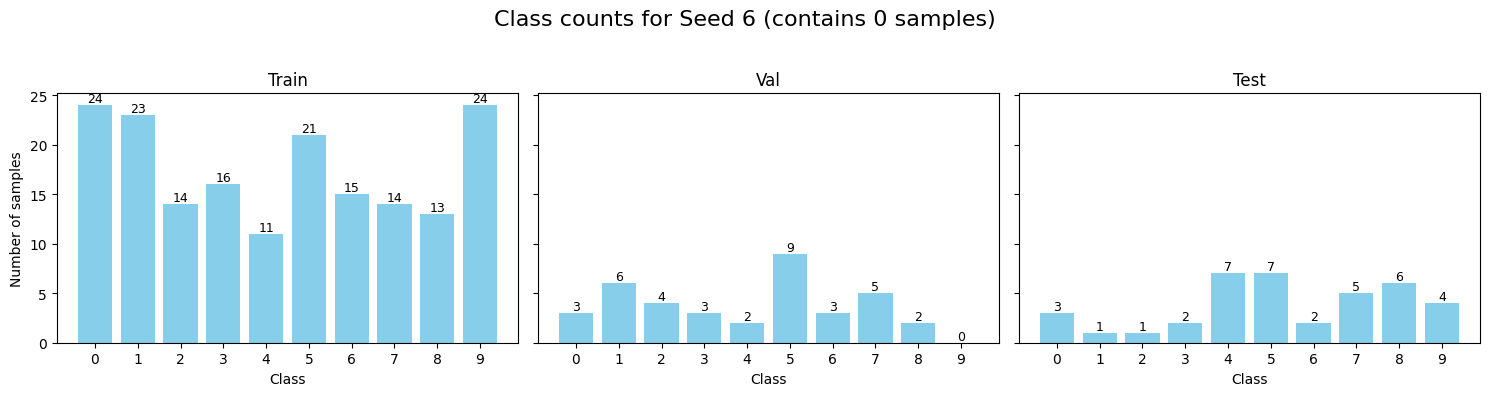

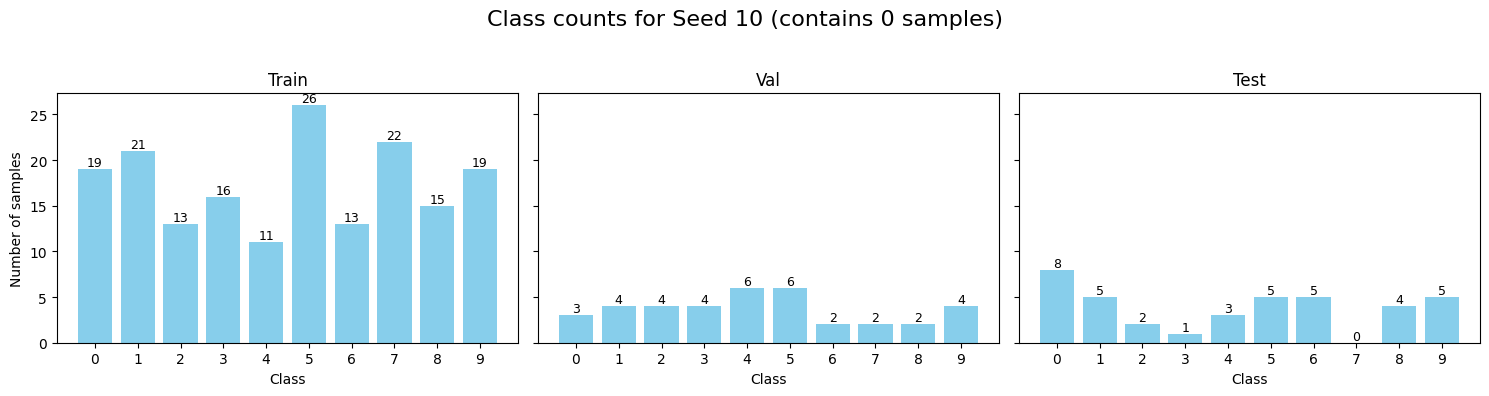

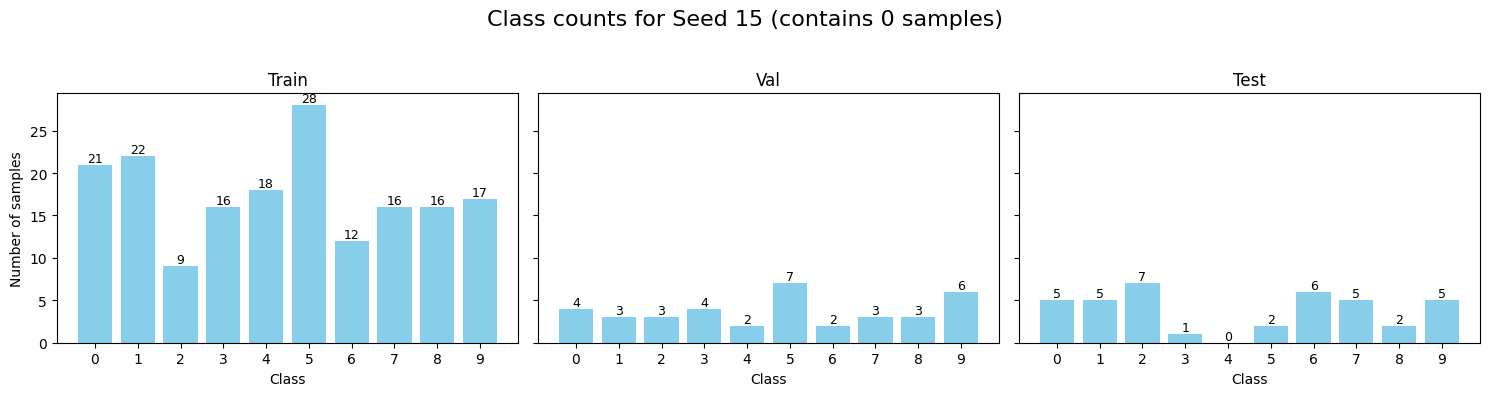

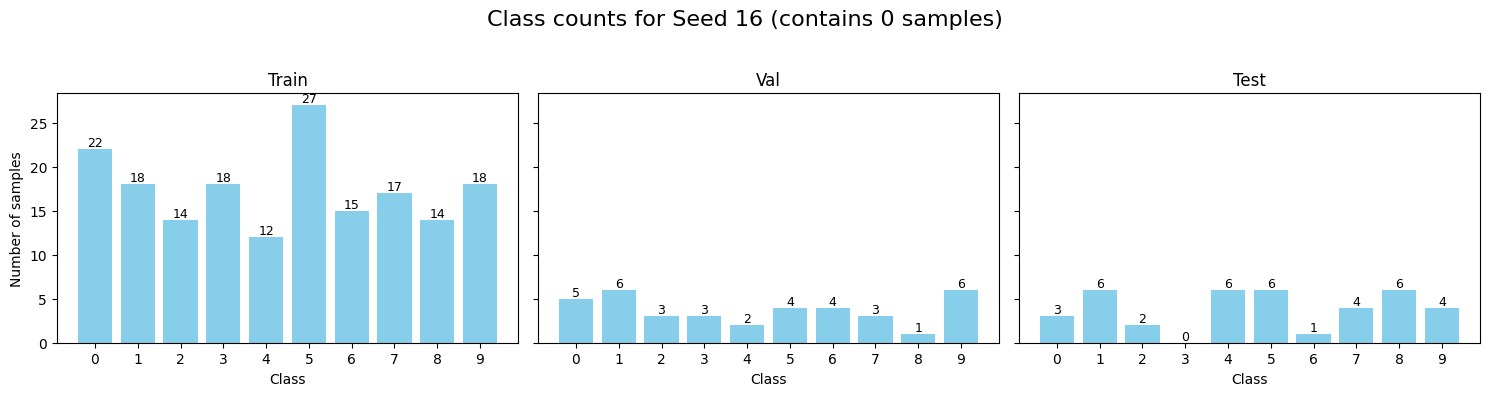

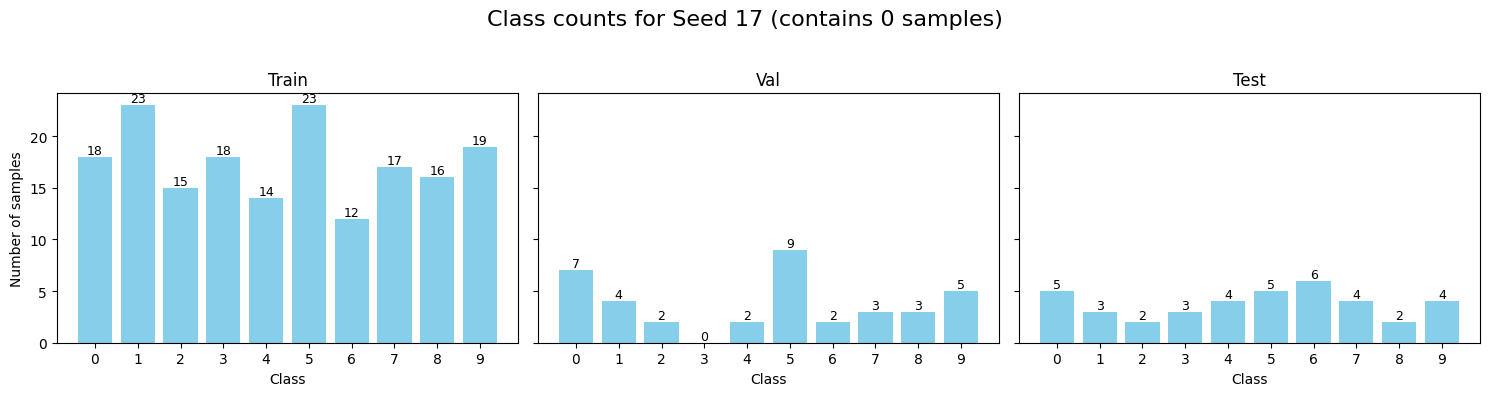

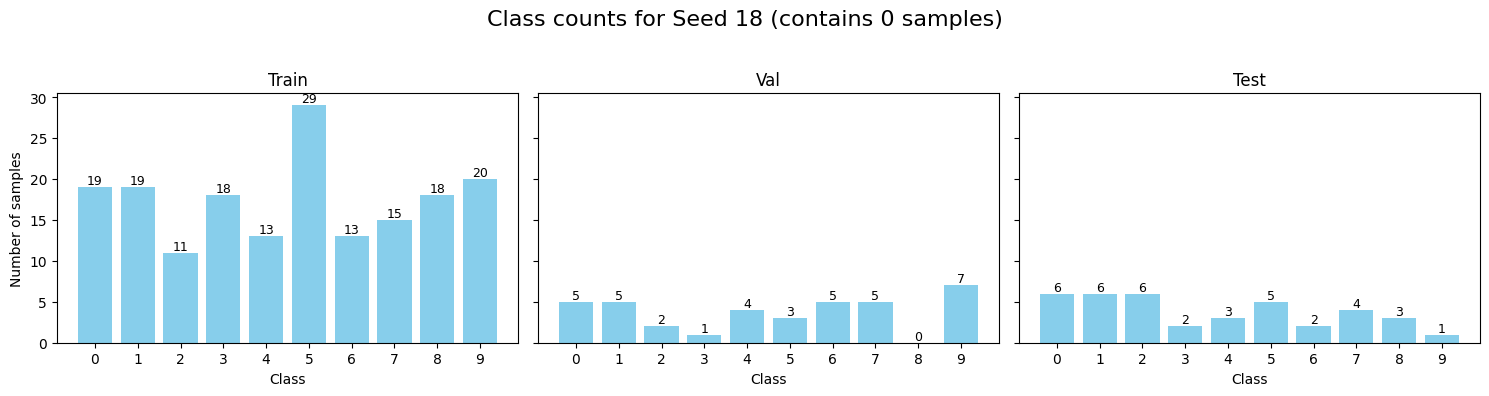

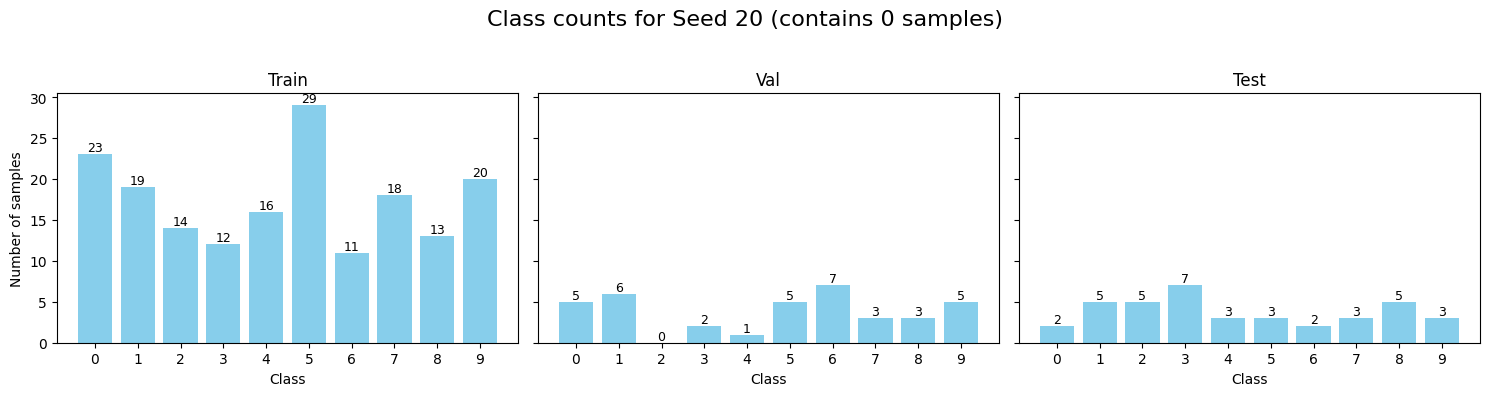

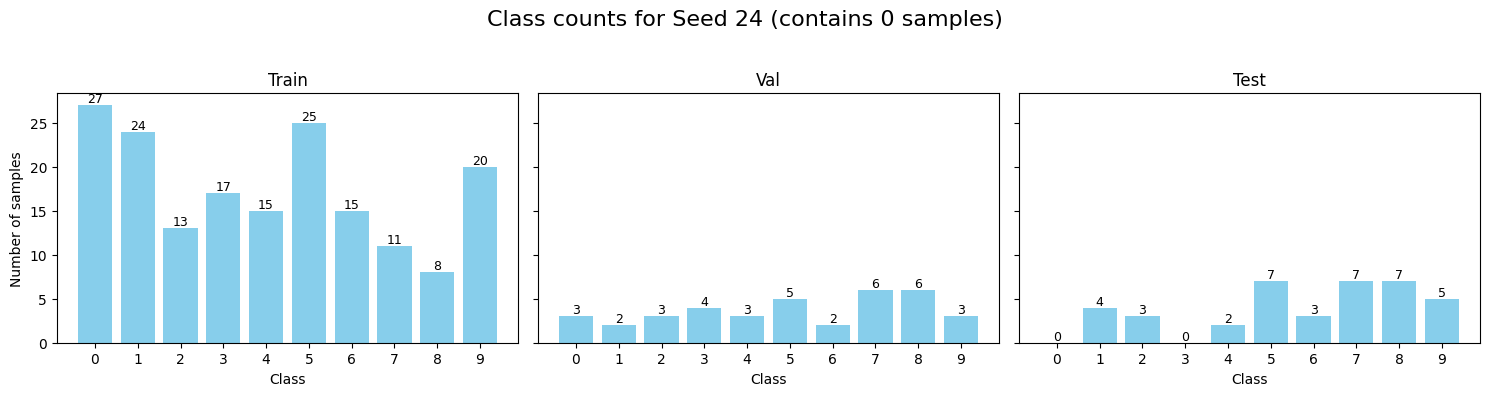

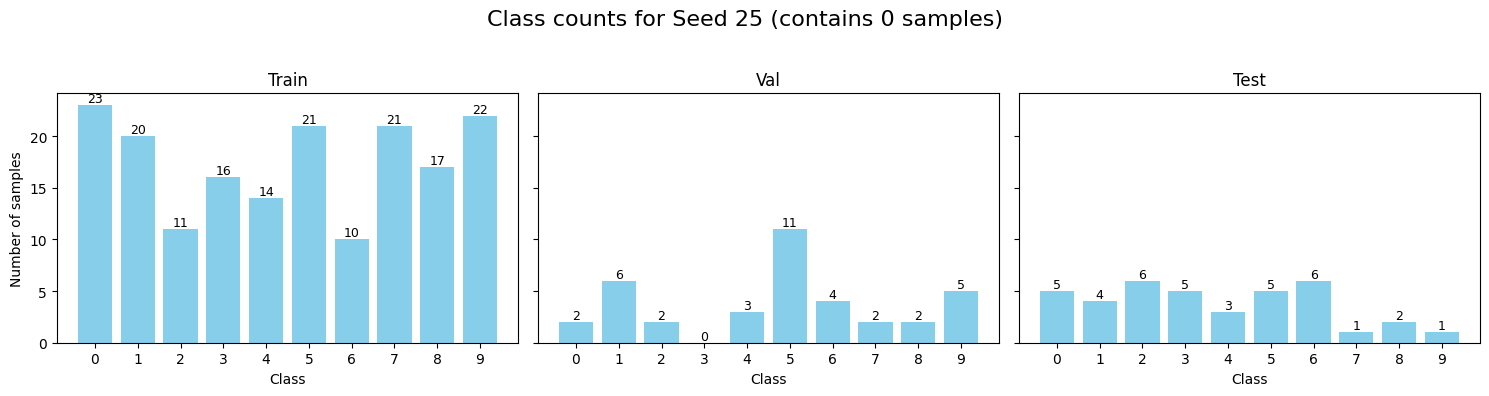

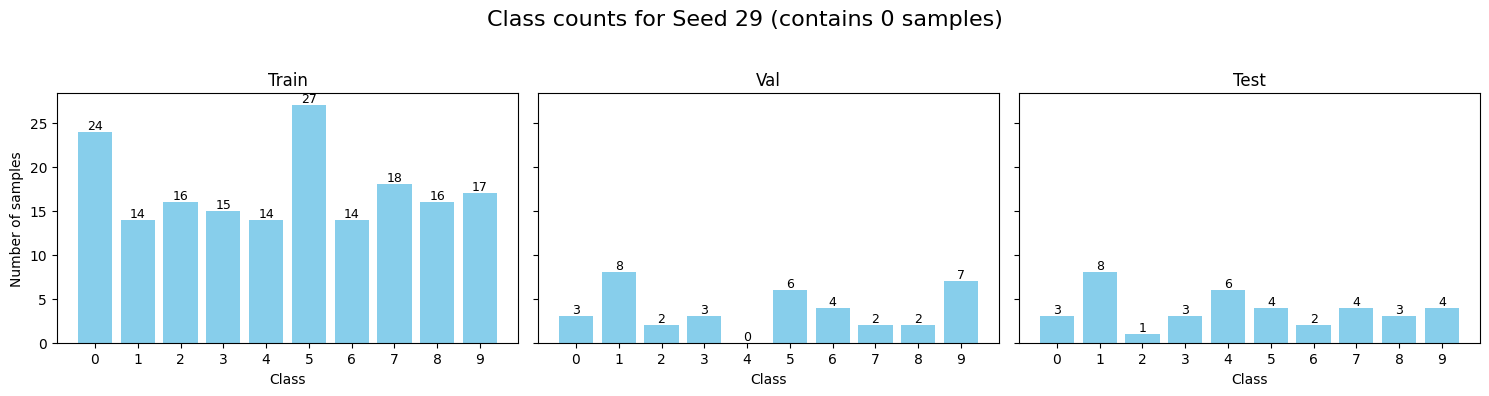

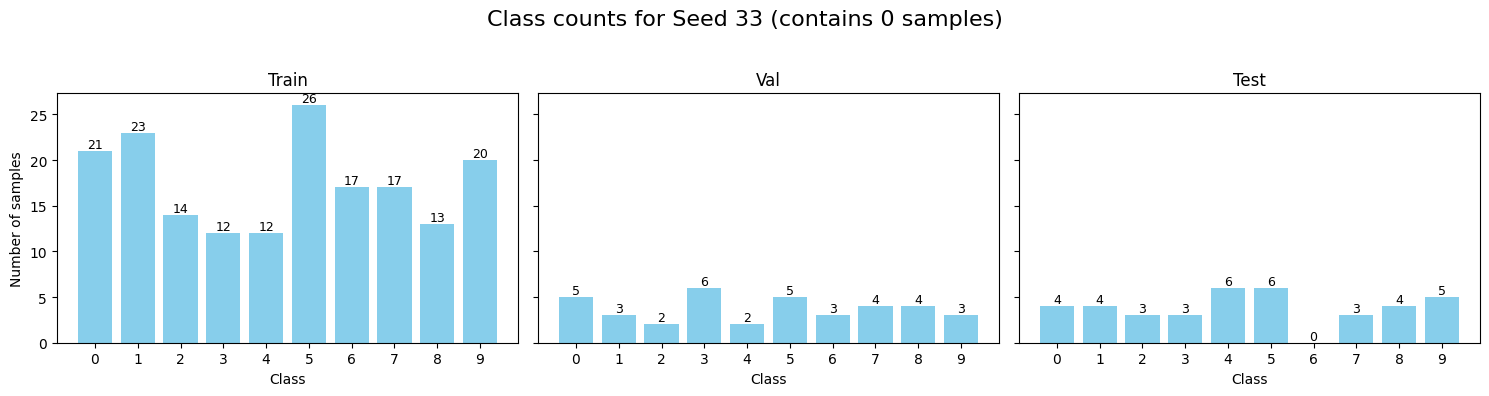

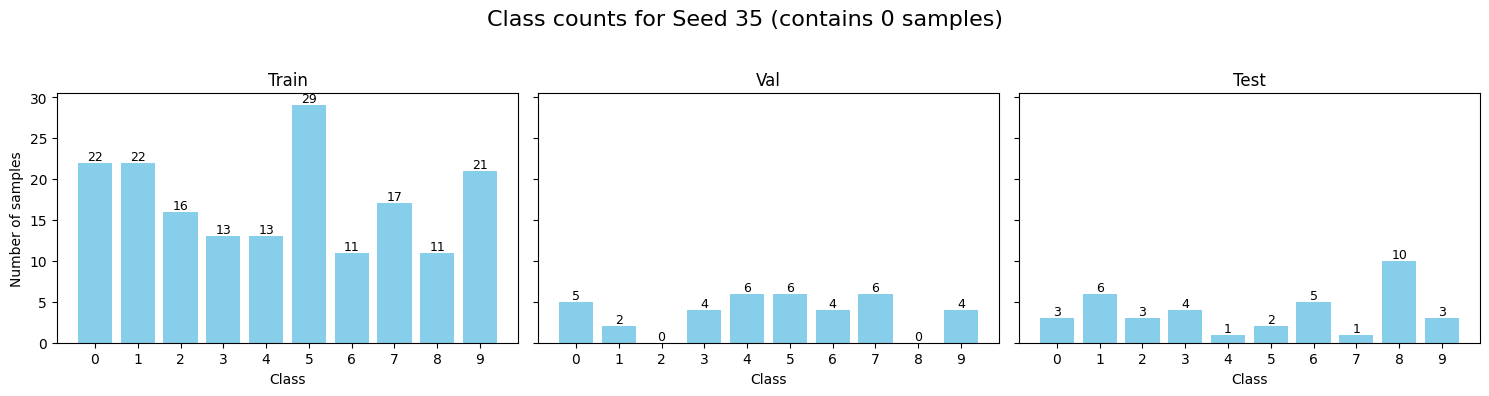

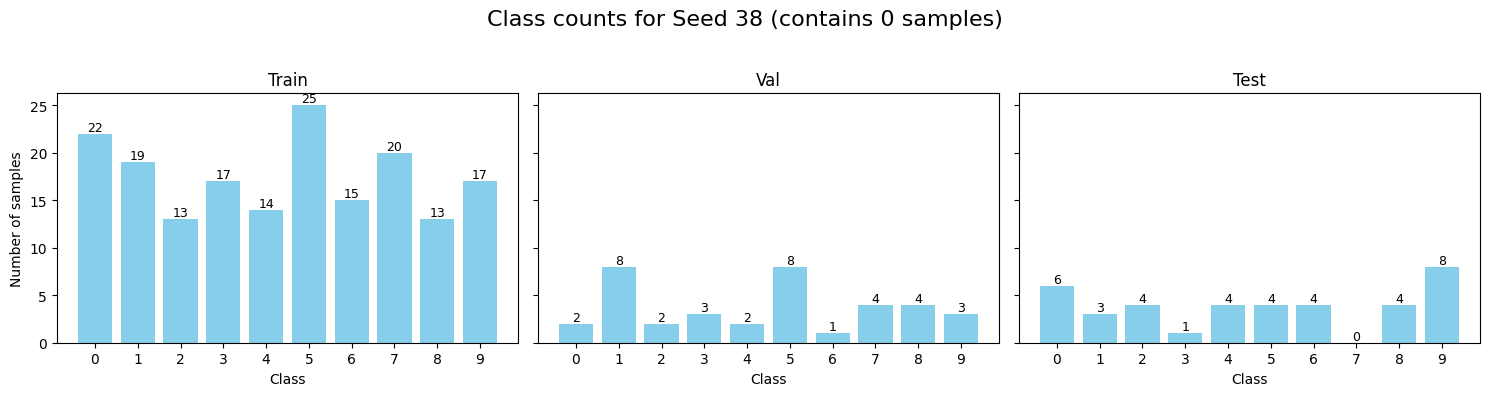

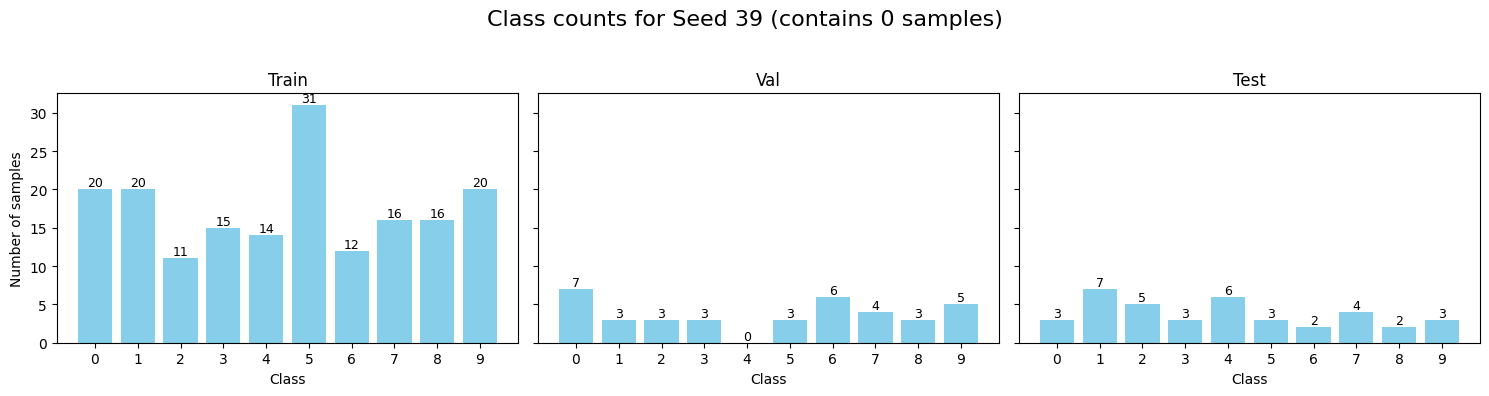

In [ ]:
#1a.5 Vooronderzoek of dat we stratafied split nodig hebben
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# we testen 40 seeds
num_seeds = 40
classes = np.unique(y_labeled)

# voor elke seed gaan we splitten en kijken of er een class met 0 samples is
for seed in range(1, num_seeds + 1):
    # split
    x_train, x_temp, y_train, y_temp = train_test_split(
        x_labeled, y_labeled, test_size=0.3, random_state=seed
    )
    x_val, x_test, y_val, y_test = train_test_split(
        x_temp, y_temp, test_size=0.5, random_state=seed
    )

    splits = {"Train": y_train, "Val": y_val, "Test": y_test}

    # check 0 samples
    zero_in_split = False
    for split_name, y_split in splits.items():
        counts = [np.sum(y_split == c) for c in classes]
        if any([c == 0 for c in counts]):
            zero_in_split = True
            break

    if not zero_in_split:
        continue  # skip als er geen 0s zijn

    # plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    fig.suptitle(f"Class counts for Seed {seed} (contains 0 samples)", fontsize=16)

    for ax, (split_name, y_split) in zip(axes, splits.items()):
        counts = [np.sum(y_split == c) for c in classes]
        bars = ax.bar(classes, counts, color="skyblue")
        ax.set_title(split_name)
        ax.set_xlabel("Class")
        if ax == axes[0]:
            ax.set_ylabel("Number of samples")
        ax.set_xticks(classes)
        for bar, count in zip(bars, counts):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count),
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [ ]:
#1a.6 data op types controleren
type(x_labeled), type(y_labeled), type(x_unlabeled)


(numpy.ndarray, numpy.ndarray, numpy.ndarray)

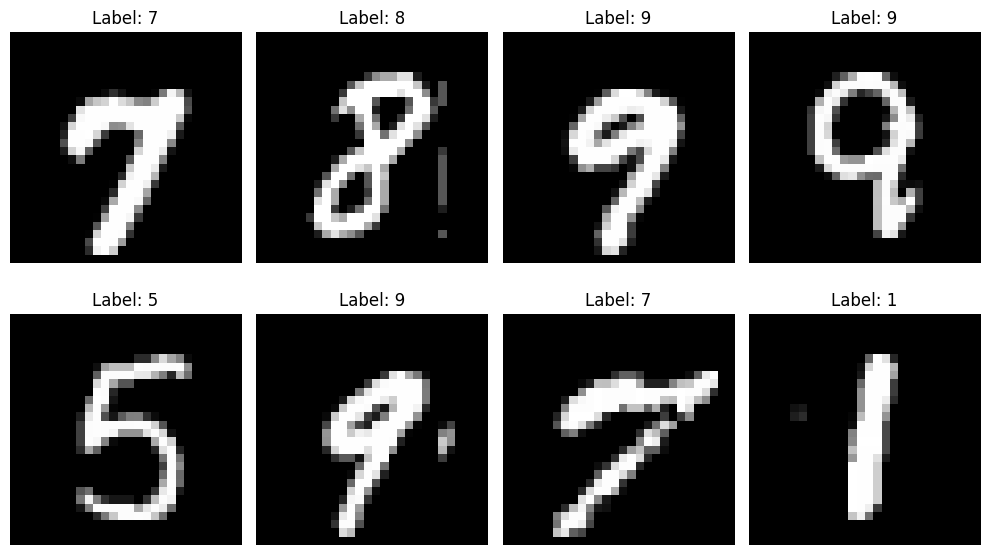

In [83]:
#1a.7 x_labeled en y_labeled data controleren
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(1)

# random visualization of some labeled data
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i in range(2):
    for j in range(4):
        idx = np.random.randint(0, x_labeled.shape[0])  # no seed here
        axes[i, j].imshow(x_labeled[idx].squeeze(), cmap='gray')
        axes[i, j].set_title(f"Label: {y_labeled[idx]}")
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

# reset random seed 
np.random.seed(None)


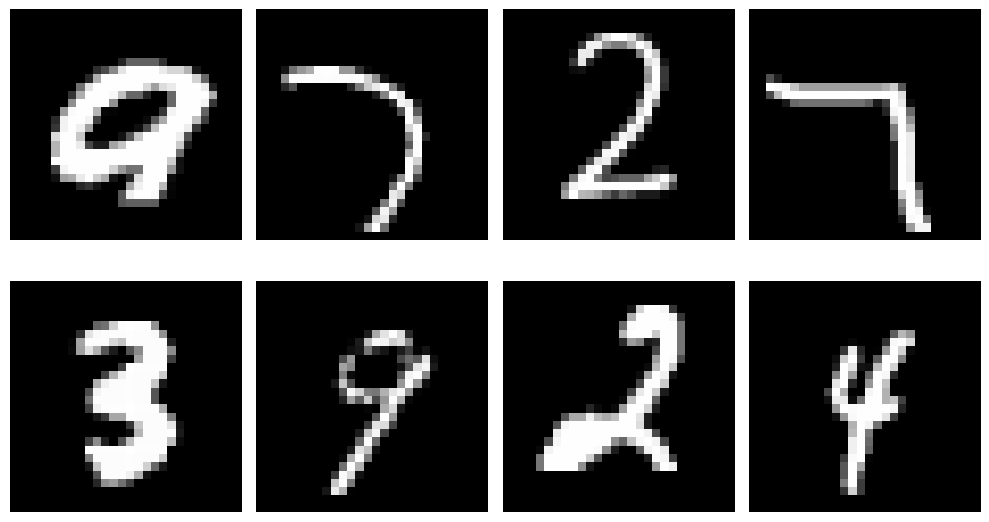

In [84]:
#1a.8 x_unlabaled data controleren
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(1)

# random visualization of some labeled data
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i in range(2):
    for j in range(4):
        idx = np.random.randint(0, x_unlabeled.shape[0])
        axes[i, j].imshow(x_unlabeled[idx].squeeze(), cmap='gray')
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()


# reset random seed 
np.random.seed(None)


#### Deel 1b. Data Preperation Code

In [ ]:
#1b.1 train test val split maken met stratification voor classifier op een seed die ik nog niet ken (zie 1c.7 van Data Verkenning antwoord voor beredenering)
from sklearn.model_selection import train_test_split
import numpy as np

# Stratified 70/15/15 split
# First split into train (70%) and temp (30%)
x_train, x_temp, y_train, y_temp = train_test_split(
    x_labeled, y_labeled,
    test_size=0.3,
    random_state=42,
    stratify=y_labeled
)

# Then split temp into val and test (each ~15%)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)


> Jouw antwoorden hier, voeg gerust cellen toe

#### Deel 1c. Data Verkenning Antwoord
- 1c.1. **in Codeblock #1.1** kan ik al zien dat we te maken hebben met data dat labels heeft `x_labeled, y_labeled` en data dat geen labels bevat `x_unlabeled`

- 1c.2. **In Codeblock #1.2** valt me gelijk op dat er veel meer samples unlabeled zijn dan labeled. 
- 1c.3. **in Codeblock #1.2** check ik de shape van de input data. Dit is bij labeled en unlabeled allebei gelijk. Dit is als verwacht maar toch even goed om te checken. Was het niet dezelfde shape moest ik ze waarschijnlijk reshapen.
- 1c.4. **In Codeblock #1.2** kan ik ook zien dat `x_labeled` en `y_labeled` dezelfde aantal samples hebben. Dit is ook als verwacht maar ook goed om te checken. Was het niet gelijk moest ik missing data oplossen maar dat is niet het geval.
- 1c.5. **In Codeblock #1.3** check ik of we inderdaad 10 klasses hebben. Zou je eigenlijk al vanuit gaan als je met de mnist dataset werkt maar toch even goed om te checken.
- 1c.6. **In Codeblock #1.4** kijk ik hoeveel data we per klass hebben. Er is geen duidelijk imbalance te zien in de data. Klasse met laagste aantal waarden is klasse 2 met 19 en hoogste klasse is 5 met 37. Moeten we stratifyen? Om hierachter te komen doe ik een klein onderzoek in #1a.5
- 1c.7. **In Codeblock #1.5**, ik weet niet precies hoe je wiskundig uitrekent wat de kansen zijn om zeker te weten of je moet stratifyen. Daarom heb ik 40 simulaties gecodeerd waarin we seeds 1 tot en met 40 splitten zonder stratification. In 14 van de 40 seeds komt voor dat er een klass 0 waardes bevat in de val of de test set. `14/40*100=35%`, dus 35% kans dat je dataset een split bevat waarbij een klass 0 is lijkt mij genoeg reden om te kiezen voor stratification. Omdat we van seeds 1 tot en met 40 de test set gezien hebben mogen deze NIET gebruikt worden tijdens het modelleren
- 1c.8. **In Codeblock #1.6** check ik nog welke type de data is. Aangezien de eerdere stappen werkte is het denk ik wel duidelijk dat het in de goede type staat maar toch even fijn om te checken.
- 1c.9. **In Codeblocks #1.7** visualizeer ik de data om te controleren of de data niet corrupt is. En om te zien of de juiste label bij de juiste nummer staat.
- 1c.10. **In Codeblocks #1.8** visualizeer ik de data om te controleren of de data niet corrupt is.


#### Deel 1d. Data Preperatie Antwoord
- 1d.1. **In Codeblock 1b.1**: data splitsen in train, test, val. Ik gebruik hiervoor stratification (zie 1c.7). Ook gebruik ik hier seed 42, het maakt niet echt uit welke seed ik gebruik als ik maar consistent dezelfde seed gebruik in deze opdracht en niet seeds 1 tot en met 40 gebruik.

#### Deel 1e. Requirements Antwoord

Ik heb de requirements op de volgende manier geformat:
<**Mijn opgestelde requirement** ~ Met reden waar ik dit vandaan haal>. De requirements zijn geschreven voordat ik ben begonnen met Deel 2 met uitzondering op requirement 1e.5, dit is de enige requirement die is opgesteld na de eerste iteratie.

- 1e.1. **Een semi-supervised model trainen** ~ *"De opdracht is om een semi-supervised model te trainen..."* (Quote uit deze opdracht)

- 1e.2. **Een unsupervised VAE trainen** ~ *"...het unsupervised (de VAE) gedeelte..."* (Quote uit deze opdracht)
- 1e.3. **De unsupervised VAE van Robert gebruiken als baseline model** ~ *"mijn code is puur voor de VAE, dus geeft strikt gesproken nog niet echt een baseline voor een classifier (al zou je bijvoorbeeld de reconstruction loss als unsupervised baseline kunnen gebruiken)"* (Robert op Teams om 20:03 12/01/2026). Ook heeft Michelangelo in de les benoemd dat hij er van uit ging dat het model van Robert als baseline gebruikt kon worden.
- 1e.4. **Reconstruction loss gebruiken voor baseline model** ~ *"mijn code is puur voor de VAE, dus geeft strikt gesproken nog niet echt een baseline voor een classifier (al zou je bijvoorbeeld de reconstruction loss als unsupervised baseline kunnen gebruiken)"* (Robert op Teams om 20:03 12/01/2026)
- 1e.5. **Unsupervised VAE verbeteren door val_reconstruction_loss < 150.5138** ~ In #2a.10 behaal ik met de code van Robert een `val_reconstruction_loss` van 150.5138. Het doel is om de VAE te verbeteren. Als ik een `val_reconstruciton_loss` lager dan 150.5138 behaal telt dit dus als verbetering.
- 1e.6. **Een supervised classifier trainen** ~ Het wordt niet direct genoemd dat de classifier supervised getrained moet worden, maar bij het lezen van de volgende quotes kan ik concluderen dat de opdracht gedeeltelijk unsupervised is en gedeeltelijk supervised. Ook kun je eruit halen dat de opdracht gedeeltelijk VAE moet zijn en gedeeltelijk een classifier. Je weet dat de VAE unsupervised moet zijn waaruit je dus kunt concluderen dat de classifier hoogstwaarschijnlijk supervised moet zijn. *"De opdracht is om een semi-supervised model te trainen dat deze data zo goed mogelijk (rekening houdend met tijd en beschikbare hardware) kan classificeren."* (Quote uit deze opdracht) en *"...het unsupervised (de VAE) gedeelte en het supervised gedeelte van je model..."* (Quote uit deze opdracht)
- 1e.7. **Seeds 1 tot en met 40 niet gebruiken** ~ in #1a.5 doe ik een klein onderzoek om te checken of het nodig is om stratification te gebruiken. Dit vooronderzoek gebruikte de train/test/val splits op seeds 1 tot en met 40. Hiervan heb ik ook de testset ingezien. Daarom mag ik deze niet verder gebruiken in het modelleren anders resulteert het in data leakage.
- 1e.8. **Stratification Gebruiken** ~ In #1a.5 toon ik aan waarom stratification een goede keuze is in deze opdracht.
- 1e.9. **Minimaal 2 iteraties op de unsupervised VAE** ~ *"Je **ontwikkelt een nieuw** of voorgetraind **AI-model volgens een iteratief en systematisch proces**."* (Quote uit deze opdracht)
- 1e.10. **Minimaal 2 iteraties op de classifier** ~ *"Je **ontwikkelt een nieuw** of voorgetraind **AI-model volgens een iteratief en systematisch proces**."* (Quote uit deze opdracht)

#### Deel 1f. Werkwijze

- Deze keuzes worden meer in detail besproken voor en na iteraties in markdown blokjes
- Dit stuk is geschreven voordat ik ben begonnen aan de opdracht en aangevuld nadat ik klaar was

Variational Auto Encoder

1. In de eerste iteratie heb ik de code van Robert gerund en de `val_reconstruction_loss` als baseline gebruikt
2. In de tweede iteratie heb ik geprobeerd de optimale dimensies op te zoeken met grid search om zo de baseline te verbeteren
3. In de derde iteratie heb ik getest of **een model** verder kan leren na 10 epochs

VAE+Classifier
1. In de eerste iteratie een extreem simpele classifier getrained dmv de VAE. Deze extreem simpele classifier gebruik ik dus ook als baseline. Ik verantwoord niet de design keuzes van deze classifier maar het is een extreem simpele classifier met enkel een softmax laag dus vind ik het een voor de hand liggende design keuze.
2. In de tweede iteratie probeer ik de baseline classifier te verbeteren. Dit heb ik gedaan door een dense laag toe te voegen. Nogmaals, geen geavanceerde design keuzes, gewoon de eerst meest voor de hand liggende keuze die je zou nemen. Ik kan me niet voorstellen dat je dit zou moeten verantwoorden, zou wel jammer zijn als het wel moet.

Bronnenlijst
- [1] L. Bonheme and M. Grzes, "FONDUE: An Algorithm to Find the Optimal Dimensionality of the Latent Representations of Variational Autoencoders," School of Computing, University of Kent, Canterbury, UK, 2026. Available: {lb732, m.grzes}@kent.ac.uk



### Deel 2

Maak een eerste model en verbeter dit via een iteratief en systematisch proces.

> Notitie

> Om de code makkelijk vindbaar en refereerbaar te maken gebruiken de codeblocks het getal van het huidige deel. Bijvoorbeeld: codeblock 2a.1 hoort bij Deel 2a, codeblock 2b.10.3 hoort bij deel 2b etc.

#### Deel 2a. Eerste Iteratie op VAE
*Unsupervised VAE code van Robert runnen (Baseline model)*

In [ ]:
#2a.1 Imports
import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import visualkeras

from keras import layers
if torch.cuda.is_available():
    print('Notebook gebruikt windows GPU')

import matplotlib.pyplot as plt

Notebook gebruikt windows GPU


In [ ]:
# 2a.2 Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = (np.expand_dims(x_train, -1).astype("float32"))/ 255
x_test = (np.expand_dims(x_test, -1).astype("float32")) / 255

In [ ]:
# 2a.3 Define VAE components
class Sampler(keras.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator()
        self.built = True

    def call(self, z_mean, z_log_var):
        batch_size = keras.ops.shape(z_mean)[0]
        z_size = keras.ops.shape(z_mean)[1]
        epsilon = keras.random.normal(
            (batch_size, z_size), seed=self.seed_generator
        )
        return z_mean + keras.ops.exp(0.5 * z_log_var) * epsilon
    
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    def call(self, inputs):
        return self.encoder(inputs)

    def compute_loss(self, x, y, y_pred, sample_weight=None, training=True):
        z_mean, z_log_var = y_pred
        reconstruction = self.decoder(self.sampler(z_mean, z_log_var))

        reconstruction_loss = keras.ops.mean(
            keras.ops.sum(
                keras.ops.binary_crossentropy(x, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * (
            1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var)
        )
        total_loss = reconstruction_loss + keras.ops.mean(kl_loss)

        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return total_loss

In [ ]:
# 2a.4 Set latent dimension
latent_dim = 2

In [ ]:
#2a.5 Build encoder
image_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(image_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(image_inputs, [z_mean, z_log_var], name="encoder")

#| label: encoder-summary
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 14, 14,    │        320 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 3136)      │          0 │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 16)        │     50,192 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │         34 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │         34 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\thezo\anaconda3\envs\ment2b2\Lib\site-packages\visualkeras\layered.py:231: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


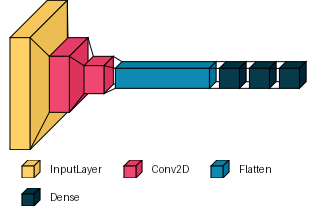

In [ ]:
#2a.6 Visualize encoder
for layer in encoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(encoder, scale_z=0.03, legend=True)

In [ ]:
#2a.7 Build decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16, activation="relu")(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="Decoder")
#| label: decoder-summary

decoder.summary()

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3136)           │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,041 (425.94 KB)

 Trainable params: 109,041 (425.94 KB)

 Non-trainable params: 0 (0.00 B)

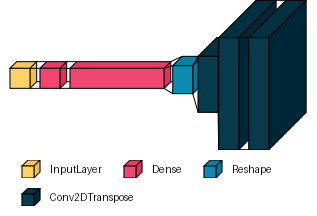

In [ ]:
#2a.8 Visualize decoder
for layer in decoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(decoder, scale_z = 0.03, legend=True)

In [ ]:
#2a.9 Check GPU availability
import torch

print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

CUDA available: True
Number of GPUs: 1
GPU name: NVIDIA GeForce RTX 2060


In [ ]:
#2a.10 Train VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
hist = vae.fit(x_train, epochs=10, validation_split = 0.2, batch_size=128)



vae.save_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'wb') as file:
    pickle.dump(hist.history, file)



vae.load_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'rb') as file:
    hist = pickle.load(file)

#| include: false
vae.summary()

Epoch 1/10
  1/375 ━━━━━━━━━━━━━━━━━━━━ 1:15 202ms/step - kl_loss: 1.1553 - loss: 219.6954 - reconstruction_loss: 218.5402

c:\Users\thezo\anaconda3\envs\ment2b2\Lib\site-packages\keras\src\backend\common\backend_utils.py:92: UserWarning: You might experience inconsistencies across backends when calling conv transpose with kernel_size=3, stride=2, dilation_rate=1, padding=same, output_padding=1.
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - kl_loss: 2.9508 - loss: 189.1777 - reconstruction_loss: 186.2270 - val_kl_loss: 4.0567 - val_loss: 173.2623 - val_reconstruction_loss: 169.2147
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - kl_loss: 3.8573 - loss: 169.2051 - reconstruction_loss: 165.3479 - val_kl_loss: 3.8733 - val_loss: 164.8288 - val_reconstruction_loss: 160.9658
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - kl_loss: 3.9135 - loss: 163.9955 - reconstruction_loss: 160.0820 - val_kl_loss: 4.0097 - val_loss: 162.1860 - val_reconstruction_loss: 158.1824
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - kl_loss: 3.9434 - loss: 161.2621 - reconstruction_loss: 157.3188 - val_kl_loss: 3.8379 - val_loss: 160.0100 - val_reconstruction_loss: 156.1832
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - kl_loss: 3.9387 - loss: 159.4559 - reconstruction_loss: 155.5173 - val_kl_loss: 3.9823 - val_loss: 158.0616 - val_reconstruction_loss: 154.0843
Epoch 6/10


Model: "vae_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 2), (None, 2)) │        69,076 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 28, 28, 1)      │       109,041 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sampler_1 (Sampler)             │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534,353 (2.04 MB)

 Trainable params: 178,117 (695.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 356,236 (1.36 MB)

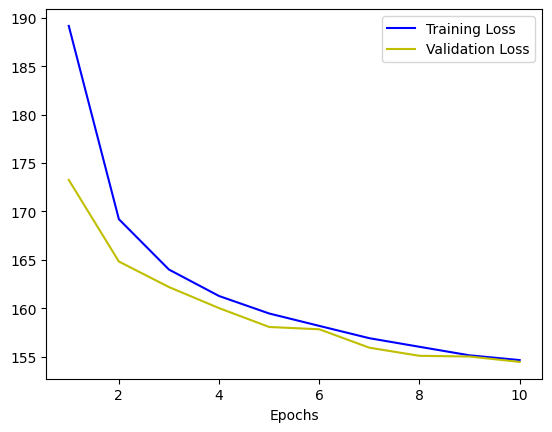

In [ ]:
#2a.11 Plot training history
epochs = range(1, len(hist['loss'])+1)
plt.plot(epochs, 'loss', 'b-', data = hist, label = 'Training Loss')
plt.plot(epochs, 'val_loss', 'y-', data = hist, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
#2a.12 Encode and decode some digits
latent, _ = vae.encoder.predict(x_train)
xnew = vae.decoder.predict(latent)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step
  15/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step

c:\Users\thezo\anaconda3\envs\ment2b2\Lib\site-packages\keras\src\backend\common\backend_utils.py:92: UserWarning: You might experience inconsistencies across backends when calling conv transpose with kernel_size=3, stride=2, dilation_rate=1, padding=same, output_padding=1.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step


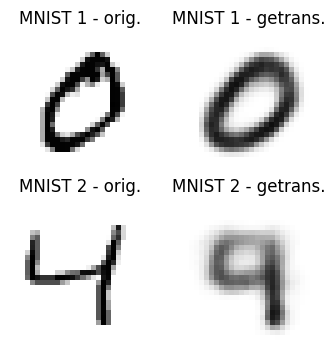

In [ ]:
#2a.13 Plot original and reconstructed digits
plt.figure(figsize = (4,4))
plt.subplot(2,2,1)
plt.imshow(1-x_train[1].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - orig.')
plt.subplot(2,2,2)
plt.imshow(1-xnew[1,:,:,0], cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - getrans.')
plt.subplot(2,2,3)
plt.imshow(1-x_train[2].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - orig.')
plt.subplot(2,2,4)
plt.imshow(1-xnew[2,:,:,0], cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - getrans.')
plt.show()

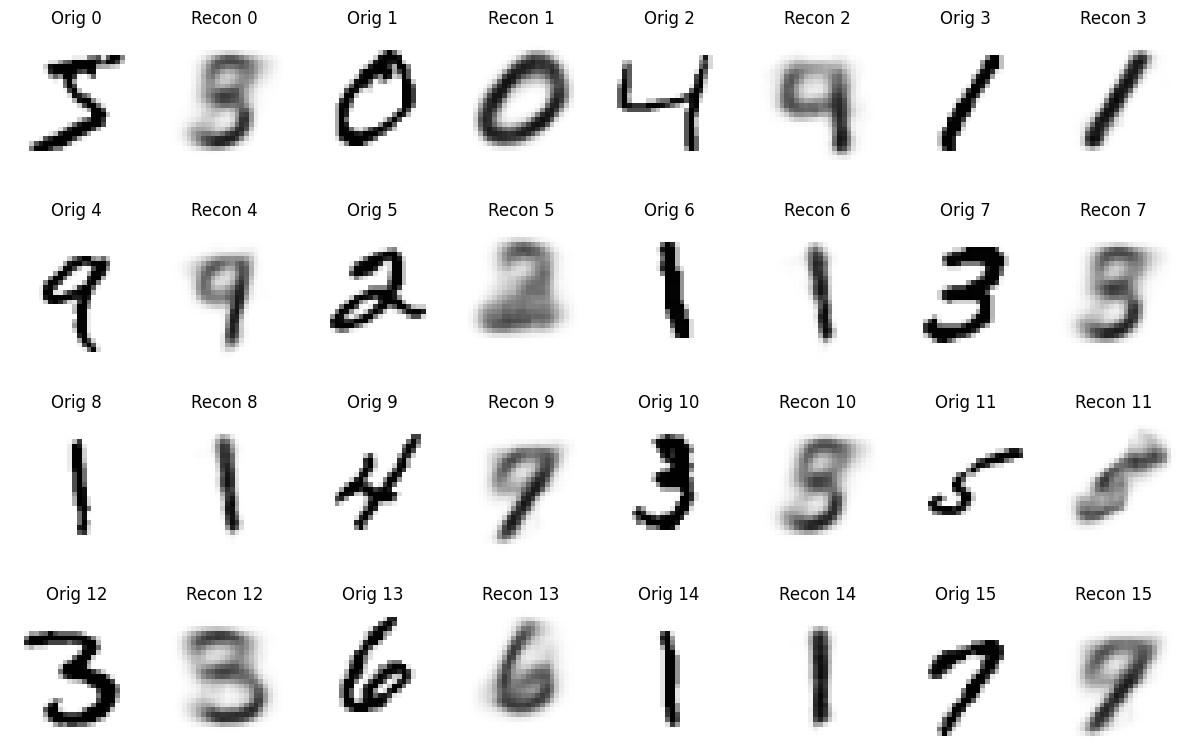

In [ ]:
#2a.14 Plot multiple original and reconstructed digits
num_images = 16
plt.figure(figsize=(12, 8))

for i in range(num_images):
    # Original
    plt.subplot(4, 8, 2*i + 1)
    plt.imshow(1 - x_train[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Orig {i}')

    # Reconstructed
    plt.subplot(4, 8, 2*i + 2)
    plt.imshow(1 - xnew[i,:,:,0], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Recon {i}')

plt.tight_layout()
plt.show()


> Conclusie Eerste Iteratie

De code van Robert heeft een reconstruction loss van `150.5138` behaald (zie 2a.10). Nu is het doel om deze te verbeteren in de tweede iteratie.

> Volgende Stap

Voor mijn volgende iteratie ga ik een grid search toepassen op de `latent_dim`. Het gebruik van grid search om de beste `latent_dim` te vinden is gebasseerd op de FONDUE paper [1] (Abstract: "determining the optimal number of latent variables is mostly done by grid search."). Daadwerkelijk FONDUE gebruiken kan sneller en betere resultaten opleveren. Maar ik heb nog erg weinig tijd en ik wil niet riskeren om iets begrijpen en uit te zoeken wat misschien helemaal niet past in mijn probleem.

#### Deel 2b. Tweede Iteratie op VAE
*Gridsearch op dimensies met als doel om de reconstruction loss lager te krijgen dan 150.5138*

In [ ]:
#2b.1 Imports
import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import visualkeras

from keras import layers
if torch.cuda.is_available():
    print('Notebook gebruikt windows GPU')

import matplotlib.pyplot as plt

Notebook gebruikt windows GPU


In [ ]:
# 2b.2 Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = (np.expand_dims(x_train, -1).astype("float32"))/ 255
x_test = (np.expand_dims(x_test, -1).astype("float32")) / 255

In [ ]:
# 2b.3 Define VAE components
class Sampler(keras.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator()
        self.built = True

    def call(self, z_mean, z_log_var):
        batch_size = keras.ops.shape(z_mean)[0]
        z_size = keras.ops.shape(z_mean)[1]
        epsilon = keras.random.normal(
            (batch_size, z_size), seed=self.seed_generator
        )
        return z_mean + keras.ops.exp(0.5 * z_log_var) * epsilon
    
# we veranderen deze class een beetje maar hij doet in princiepe nog hetzelfde, maar nu kan ik de loss tracken voor in grid search
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    # dit dus
    @property
    def metrics(self):
        return [
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        return self.encoder(inputs)

    def compute_loss(self, x, y, y_pred, sample_weight=None, training=True):
        z_mean, z_log_var = y_pred
        reconstruction = self.decoder(self.sampler(z_mean, z_log_var))

        reconstruction_loss = keras.ops.mean(
            keras.ops.sum(
                keras.ops.binary_crossentropy(x, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * (
            1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var)
        )

        total_loss = reconstruction_loss + keras.ops.mean(kl_loss)

        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return total_loss


In [ ]:
# 2b.4 Grid search over latent dimensions
latent_candidates = [2, 8, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256]
results = []

for latent_dim in latent_candidates:
    print(f"\nTraining VAE with latent_dim = {latent_dim}")

    # Build encoder
    image_inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(image_inputs)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation="relu")(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    encoder = keras.Model(image_inputs, [z_mean, z_log_var], name="encoder")

    # Build decoder
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(16, activation="relu")(latent_inputs)
    x = layers.Dense(7 * 7 * 64, activation="relu")(x)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
    decoder = keras.Model(latent_inputs, decoder_outputs, name="Decoder")

    # Train VAE
    vae = VAE(encoder, decoder)
    vae.compile(optimizer=keras.optimizers.Adam())
    hist = vae.fit(
        x_train,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        verbose=0
    )

    # Store results
    min_val_recon = min(hist.history["val_reconstruction_loss"])
    min_val_kl = min(hist.history["val_kl_loss"])

    results.append({
        "latent_dim": latent_dim,
        "val_reconstruction_loss": min_val_recon,
        "val_kl_loss": min_val_kl,
    })

    print(
        f"latent_dim={latent_dim} | "
        f"val_recon={min_val_recon:.4f} | "
        f"val_kl={min_val_kl:.4f} | "
    )

best = min(results, key=lambda x: x["val_reconstruction_loss"])
print("\nBEST LATENT DIMENSION (by val_reconstruction_loss):")
print(best)



Training VAE with latent_dim = 2
latent_dim=2 | val_recon=149.6591 | val_kl=1.8913 | 

Training VAE with latent_dim = 8
latent_dim=8 | val_recon=171.4818 | val_kl=1.0216 | 

Training VAE with latent_dim = 16
latent_dim=16 | val_recon=102.3471 | val_kl=2.7825 | 

Training VAE with latent_dim = 32
latent_dim=32 | val_recon=205.6249 | val_kl=0.0005 | 

Training VAE with latent_dim = 48
latent_dim=48 | val_recon=101.1499 | val_kl=2.6556 | 

Training VAE with latent_dim = 64
latent_dim=64 | val_recon=119.1134 | val_kl=2.1415 | 

Training VAE with latent_dim = 80
latent_dim=80 | val_recon=109.2355 | val_kl=2.0845 | 

Training VAE with latent_dim = 96
latent_dim=96 | val_recon=132.6730 | val_kl=1.4362 | 

Training VAE with latent_dim = 112
latent_dim=112 | val_recon=91.4538 | val_kl=2.2822 | 

Training VAE with latent_dim = 128
latent_dim=128 | val_recon=171.4796 | val_kl=0.4472 | 

Training VAE with latent_dim = 144
latent_dim=144 | val_recon=80.5798 | val_kl=2.1469 | 

Training VAE with la

In [ ]:
#2b.5 Set latent dimension
latent_dim = 144

In [ ]:
#2b.6 Build encoder t/m 2b.10 Train VAE
image_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(image_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(image_inputs, [z_mean, z_log_var], name="encoder")

#| label: encoder-summary
encoder.summary()
# Visualize encoder
for layer in encoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(encoder, scale_z=0.03, legend=True)

#2b.7 Build decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16, activation="relu")(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="Decoder")
#| label: decoder-summary

decoder.summary()
#2b.8 Visualize decoder
for layer in decoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(decoder, scale_z = 0.03, legend=True)
#2b.9 Check GPU availability
import torch

print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
#2b.10 Train VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
hist = vae.fit(x_train, epochs=10, validation_split = 0.2, batch_size=128)



vae.save_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'wb') as file:
    pickle.dump(hist.history, file)



vae.load_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'rb') as file:
    hist = pickle.load(file)

#| include: false
vae.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_67      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_68 (Conv2D)  │ (None, 14, 14,    │        320 │ input_layer_67[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_69 (Conv2D)  │ (None, 7, 7, 64)  │     18,496 │ conv2d_68[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_34          │ (None, 3136)      │          0 │ conv2d_69[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_100 (Dense)   │ (None, 16)        │     50,192 │ flatten_34[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 144)       │      2,448 │ dense_100[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 144)       │      2,448 │ dense_100[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 73,904 (288.69 KB)

 Trainable params: 73,904 (288.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_68 (InputLayer)     │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 16)             │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 3136)           │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_33 (Reshape)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_99             │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_100            │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_101            │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,313 (434.82 KB)

 Trainable params: 111,313 (434.82 KB)

 Non-trainable params: 0 (0.00 B)

CUDA available: True
Number of GPUs: 1
GPU name: NVIDIA GeForce RTX 2060
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 1.0831 - reconstruction_loss: 187.2539 - val_kl_loss: 2.2338 - val_reconstruction_loss: 129.8725
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 2.3599 - reconstruction_loss: 112.6776 - val_kl_loss: 2.4344 - val_reconstruction_loss: 101.1342
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 2.5122 - reconstruction_loss: 93.4369 - val_kl_loss: 2.5641 - val_reconstruction_loss: 88.2294
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 2.5077 - reconstruction_loss: 85.8557 - val_kl_loss: 2.5117 - val_reconstruction_loss: 84.6555
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 2.4650 - reconstruction_loss: 82.9606 - val_kl_loss: 2.4977 - val_reconstruction_loss: 82.2968
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - kl_loss: 2.4370 - reconstruction_loss: 81.0967 - val_kl_loss: 2.4540 - va

Model: "vae_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 144), (None,   │        73,904 │
│                                 │ 144))                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 28, 28, 1)      │       111,313 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sampler_33 (Sampler)            │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,653 (2.12 MB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,436 (1.41 MB)

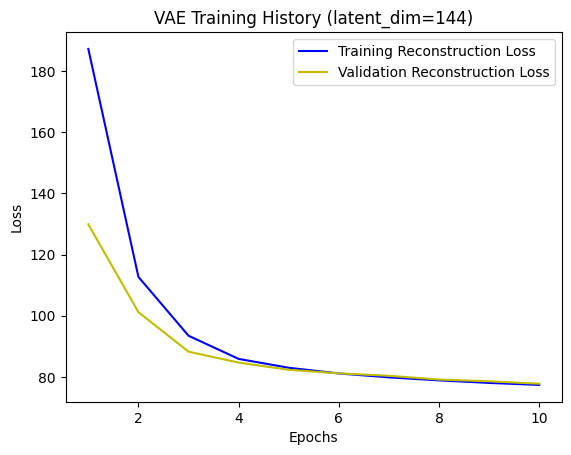

In [ ]:
#2b.11 Plot training history
# Extract epochs
epochs = range(1, len(hist['reconstruction_loss']) + 1)

# Plot reconstruction loss
plt.plot(epochs, hist['reconstruction_loss'], 'b-', label='Training Reconstruction Loss')
plt.plot(epochs, hist['val_reconstruction_loss'], 'y-', label='Validation Reconstruction Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'VAE Training History (latent_dim={latent_dim})')
plt.legend()
plt.show()


In [ ]:
#2b.12 Encode and decode some digits
latent, _ = vae.encoder.predict(x_train)
xnew = vae.decoder.predict(latent)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
  20/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step

c:\Users\thezo\anaconda3\envs\ment2b2\Lib\site-packages\keras\src\backend\common\backend_utils.py:92: UserWarning: You might experience inconsistencies across backends when calling conv transpose with kernel_size=3, stride=2, dilation_rate=1, padding=same, output_padding=1.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


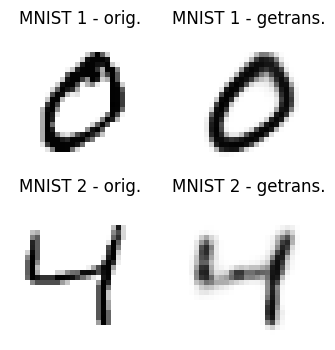

In [110]:
#2b.13 Plot original and reconstructed digits
plt.figure(figsize = (4,4))
plt.subplot(2,2,1)
plt.imshow(1-x_train[1].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - orig.')
plt.subplot(2,2,2)
plt.imshow(1-xnew[1,:,:,0], cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - getrans.')
plt.subplot(2,2,3)
plt.imshow(1-x_train[2].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - orig.')
plt.subplot(2,2,4)
plt.imshow(1-xnew[2,:,:,0], cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - getrans.')
plt.show()

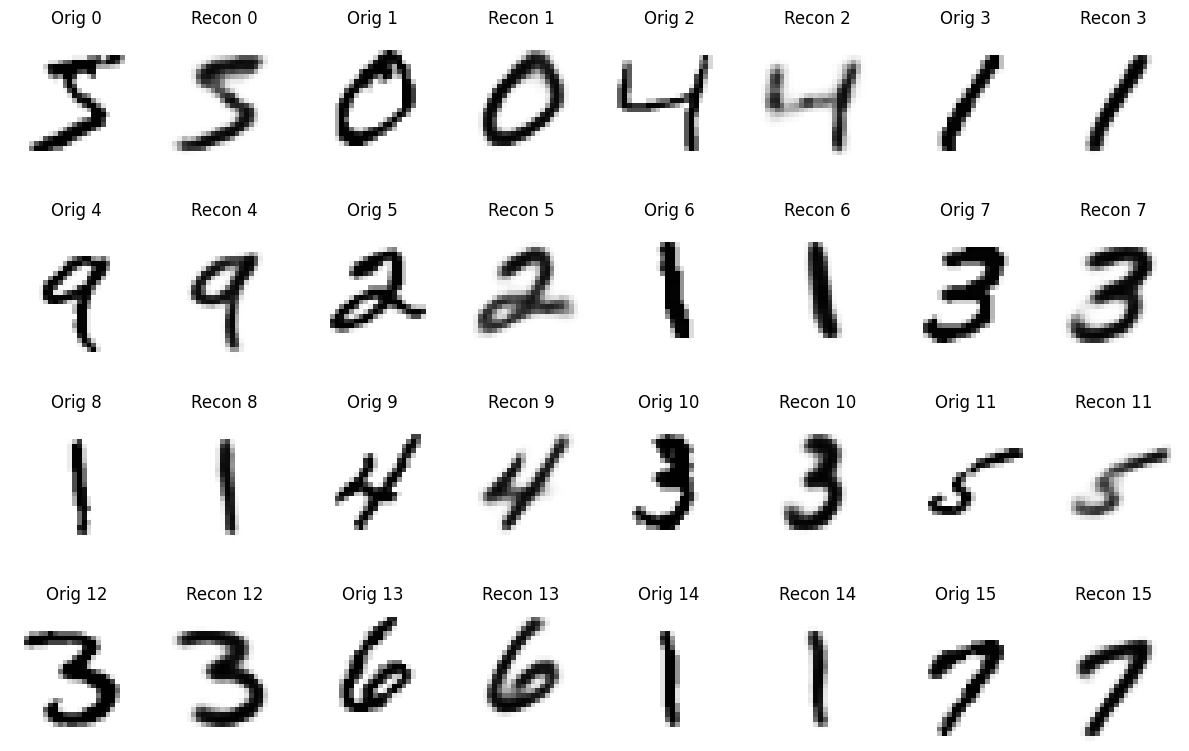

In [111]:
#2b.14 Plot multiple original and reconstructed digits
num_images = 16
plt.figure(figsize=(12, 8))

for i in range(num_images):
    # Original
    plt.subplot(4, 8, 2*i + 1)
    plt.imshow(1 - x_train[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Orig {i}')

    # Reconstructed
    plt.subplot(4, 8, 2*i + 2)
    plt.imshow(1 - xnew[i,:,:,0], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Recon {i}')

plt.tight_layout()
plt.show()

> Jouw antwoorden hier, voeg gerust cellen toe

> Conclusie tweede iteratie

De reconstruction loss op de validatie set is verbeterd ten opzichte van het model van Robert. In de eerste Iteratie behaalde we een reconstruction loss van `150.5138` en in de tweede hebben we dat verbeterd naar `77.3466`. Ook als we kijken naar Codeblock #2a.13 en #2a.14 (Iteratie 1) en deze vergelijken met codeblocks #2b.13 en #2b.14 (iteratie 2), dan kunnen we ook daadwerkelijk zien dat de reconstrucies veel minder wazig zijn.

> Volgende Stap

Ik ga nog een iteratie verder met de VAE omdat ik nog een mogelijke verbetering zie. In de output van Codeblock: `2b.6 Build encoder t/m 2b.10 Train VAE` zien we de reconstrucie loss in de laatste 6 epochs per epoch dalen met 1. Dit zou kunnen indiceren dat 10 epochs misschien te weinig is. Daarom ga ik de epochs verhogen om te zien of we de reconstrucie loss nog lager kunnen krijgen.

#### Deel 2c. Derde Iteratie op VAE
*Epochs Verhogen van de unsupervised VAE met nogsteeds 144 dimensies met als doel de reconstruction loss nog lager te krijgen dan 77.3466*

In [38]:
#2c.1 Imports
import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import visualkeras

from keras import layers
if torch.cuda.is_available():
    print('Notebook gebruikt windows GPU')

import matplotlib.pyplot as plt

Notebook gebruikt windows GPU


In [39]:
# 2c.2 Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = (np.expand_dims(x_train, -1).astype("float32"))/ 255
x_test = (np.expand_dims(x_test, -1).astype("float32")) / 255

In [40]:
# 2c.3 Define VAE components
class Sampler(keras.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator()
        self.built = True

    def call(self, z_mean, z_log_var):
        batch_size = keras.ops.shape(z_mean)[0]
        z_size = keras.ops.shape(z_mean)[1]
        epsilon = keras.random.normal(
            (batch_size, z_size), seed=self.seed_generator
        )
        return z_mean + keras.ops.exp(0.5 * z_log_var) * epsilon
    
# we veranderen deze class een beetje maar hij doet in princiepe nog hetzelfde, maar nu kan ik de loss tracken voor in grid search
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    # dit dus
    @property
    def metrics(self):
        return [
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        return self.encoder(inputs)

    def compute_loss(self, x, y, y_pred, sample_weight=None, training=True):
        z_mean, z_log_var = y_pred
        reconstruction = self.decoder(self.sampler(z_mean, z_log_var))

        reconstruction_loss = keras.ops.mean(
            keras.ops.sum(
                keras.ops.binary_crossentropy(x, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * (
            1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var)
        )

        total_loss = reconstruction_loss + keras.ops.mean(kl_loss)

        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return total_loss


In [41]:
#2c.4 Set latent dimension (144 want best according to 2b.4)
latent_dim = 144

In [ ]:
#2c.5 Build encoder t/m 2c.9 Check GPU availability
image_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(image_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(image_inputs, [z_mean, z_log_var], name="encoder")

#| label: encoder-summary
encoder.summary()
#2c.6 Visualize encoder
for layer in encoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(encoder, scale_z=0.03, legend=True)

#2c.7 Build decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16, activation="relu")(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="Decoder")
#| label: decoder-summary

decoder.summary()
#2c.8 Visualize decoder
for layer in decoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(decoder, scale_z = 0.03, legend=True)
#2c.9 Check GPU availability
import torch

print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 14, 14,    │        320 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 7, 7, 64)  │     18,496 │ conv2d_12[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 3136)      │          0 │ conv2d_13[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 16)        │     50,192 │ flatten_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 144)       │      2,448 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 144)       │      2,448 │ dense_18[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 73,904 (288.69 KB)

 Trainable params: 73,904 (288.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3136)           │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_18             │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_19             │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_20             │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,313 (434.82 KB)

 Trainable params: 111,313 (434.82 KB)

 Non-trainable params: 0 (0.00 B)

CUDA available: True
Number of GPUs: 1
GPU name: NVIDIA GeForce RTX 2060


In [ ]:
#2c.10.1 Train VAE (epochs veranderd en early stopping toegevoegd)
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_reconstruction_loss",
    min_delta=0.250,          # must improve by at least 0.5
    patience=5,             # wait 5 epochs
    mode="min",
    restore_best_weights=True,
    verbose=1
)


vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
hist = vae.fit(x_train, epochs=100, validation_split = 0.2, batch_size=128, callbacks=[early_stopping])



vae.save_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'wb') as file:
    pickle.dump(hist.history, file)



vae.load_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'rb') as file:
    hist = pickle.load(file)

#| include: false
vae.summary()

Epoch 1/100


375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - kl_loss: 1.0196 - reconstruction_loss: 192.1317 - val_kl_loss: 2.1889 - val_reconstruction_loss: 130.2243
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 2.2991 - reconstruction_loss: 113.2661 - val_kl_loss: 2.3019 - val_reconstruction_loss: 103.3495
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - kl_loss: 2.3272 - reconstruction_loss: 98.8884 - val_kl_loss: 2.3371 - val_reconstruction_loss: 97.1336
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - kl_loss: 2.2911 - reconstruction_loss: 94.3284 - val_kl_loss: 2.2808 - val_reconstruction_loss: 93.8193
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - kl_loss: 2.2507 - reconstruction_loss: 91.9274 - val_kl_loss: 2.2197 - val_reconstruction_loss: 92.6857
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.2167 - reconstruction_loss: 90.3039 - val_kl_loss: 2.1557 - val_reconstruction_loss: 90.5920
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23

Model: "vae_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 144), (None,   │        73,904 │
│                                 │ 144))                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 28, 28, 1)      │       111,313 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sampler_11 (Sampler)            │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,653 (2.12 MB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,436 (1.41 MB)

> Tussen Conclusie

Ik kom niet meer onder de 80 met `val_reconstruction_loss`. Ik denk dat ik de vorige iteratie geluk heb gehad dat ik zo een goede train heb getroffen (misschien betere random start waarden voor de weights biases). Ik heb niet de train fit op een bepaalde seed gedaan dus kan ik hem niet recreeren en kan ik dus eigenlijk ook nooit zeker weten hoeveel beter mijn model uit iteratie 2 zou worden met meer epochs. 

Toch wil ik nog proberen om te kijken of ik onder de 77 `val_reconstruction_loss` kan komen, dus ga ik meerdere runs uitvoeren.

In [ ]:
#2c.10.2 Train VAE (Run #2)


# --- ignore --- 
import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import visualkeras

from keras import layers
if torch.cuda.is_available():
    print('Notebook gebruikt windows GPU')

import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = (np.expand_dims(x_train, -1).astype("float32"))/ 255
x_test = (np.expand_dims(x_test, -1).astype("float32")) / 255
class Sampler(keras.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator()
        self.built = True

    def call(self, z_mean, z_log_var):
        batch_size = keras.ops.shape(z_mean)[0]
        z_size = keras.ops.shape(z_mean)[1]
        epsilon = keras.random.normal(
            (batch_size, z_size), seed=self.seed_generator
        )
        return z_mean + keras.ops.exp(0.5 * z_log_var) * epsilon
    
# we veranderen deze class een beetje maar hij doet in princiepe nog hetzelfde, maar nu kan ik de loss tracken voor in grid search
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    # dit dus
    @property
    def metrics(self):
        return [
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        return self.encoder(inputs)

    def compute_loss(self, x, y, y_pred, sample_weight=None, training=True):
        z_mean, z_log_var = y_pred
        reconstruction = self.decoder(self.sampler(z_mean, z_log_var))

        reconstruction_loss = keras.ops.mean(
            keras.ops.sum(
                keras.ops.binary_crossentropy(x, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * (
            1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var)
        )

        total_loss = reconstruction_loss + keras.ops.mean(kl_loss)

        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return total_loss

latent_dim = 144
image_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(image_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(image_inputs, [z_mean, z_log_var], name="encoder")

#| label: encoder-summary
encoder.summary()
for layer in encoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(encoder, scale_z=0.03, legend=True)

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16, activation="relu")(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="Decoder")
#| label: decoder-summary

decoder.summary()
for layer in decoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(decoder, scale_z = 0.03, legend=True)
import torch

print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_reconstruction_loss",
    min_delta=0.250,          # must improve by at least 0.5
    patience=5,             # wait 5 epochs
    mode="min",
    restore_best_weights=True,
    verbose=1
)


vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
hist = vae.fit(x_train, epochs=100, validation_split = 0.2, batch_size=128, callbacks=[early_stopping])



vae.save_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'wb') as file:
    pickle.dump(hist.history, file)



vae.load_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'rb') as file:
    hist = pickle.load(file)

#| include: false
vae.summary()

Notebook gebruikt windows GPU


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 14, 14,    │        320 │ input_layer_14[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 7, 7, 64)  │     18,496 │ conv2d_14[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 3136)      │          0 │ conv2d_15[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 16)        │     50,192 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 144)       │      2,448 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 144)       │      2,448 │ dense_21[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 73,904 (288.69 KB)

 Trainable params: 73,904 (288.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3136)           │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_21             │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_22             │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_23             │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,313 (434.82 KB)

 Trainable params: 111,313 (434.82 KB)

 Non-trainable params: 0 (0.00 B)

CUDA available: True
Number of GPUs: 1
GPU name: NVIDIA GeForce RTX 2060
Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 0.9474 - reconstruction_loss: 194.0460 - val_kl_loss: 2.4209 - val_reconstruction_loss: 133.4205
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 2.3100 - reconstruction_loss: 118.0569 - val_kl_loss: 2.2460 - val_reconstruction_loss: 111.2772
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.2452 - reconstruction_loss: 106.0317 - val_kl_loss: 2.3477 - val_reconstruction_loss: 99.9771
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.2996 - reconstruction_loss: 96.8728 - val_kl_loss: 2.3107 - val_reconstruction_loss: 95.8824
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.2750 - reconstruction_loss: 93.2987 - val_kl_loss: 2.2888 - val_reconstruction_loss: 92.6126
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.2510 - reconstruction_loss: 91.1486 - val_kl_loss: 2.29

Model: "vae_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 144), (None,   │        73,904 │
│                                 │ 144))                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 28, 28, 1)      │       111,313 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sampler_12 (Sampler)            │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,653 (2.12 MB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,436 (1.41 MB)

In [ ]:
#2c.10.3 Train VAE (Run #3)
# --- ignore ---
import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import visualkeras

from keras import layers
if torch.cuda.is_available():
    print('Notebook gebruikt windows GPU')

import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = (np.expand_dims(x_train, -1).astype("float32"))/ 255
x_test = (np.expand_dims(x_test, -1).astype("float32")) / 255
class Sampler(keras.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator()
        self.built = True

    def call(self, z_mean, z_log_var):
        batch_size = keras.ops.shape(z_mean)[0]
        z_size = keras.ops.shape(z_mean)[1]
        epsilon = keras.random.normal(
            (batch_size, z_size), seed=self.seed_generator
        )
        return z_mean + keras.ops.exp(0.5 * z_log_var) * epsilon
    
# we veranderen deze class een beetje maar hij doet in princiepe nog hetzelfde, maar nu kan ik de loss tracken voor in grid search
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    # dit dus
    @property
    def metrics(self):
        return [
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        return self.encoder(inputs)

    def compute_loss(self, x, y, y_pred, sample_weight=None, training=True):
        z_mean, z_log_var = y_pred
        reconstruction = self.decoder(self.sampler(z_mean, z_log_var))

        reconstruction_loss = keras.ops.mean(
            keras.ops.sum(
                keras.ops.binary_crossentropy(x, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * (
            1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var)
        )

        total_loss = reconstruction_loss + keras.ops.mean(kl_loss)

        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return total_loss

latent_dim = 144
image_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(image_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(image_inputs, [z_mean, z_log_var], name="encoder")

#| label: encoder-summary
encoder.summary()
for layer in encoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(encoder, scale_z=0.03, legend=True)

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16, activation="relu")(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="Decoder")
#| label: decoder-summary

decoder.summary()
for layer in decoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(decoder, scale_z = 0.03, legend=True)
import torch

print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_reconstruction_loss",
    min_delta=0.250,          # must improve by at least 0.5
    patience=5,             # wait 5 epochs
    mode="min",
    restore_best_weights=True,
    verbose=1
)


vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
hist = vae.fit(x_train, epochs=100, validation_split = 0.2, batch_size=128, callbacks=[early_stopping])



vae.save_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'wb') as file:
    pickle.dump(hist.history, file)



vae.load_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'rb') as file:
    hist = pickle.load(file)

#| include: false
vae.summary()

Notebook gebruikt windows GPU


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 14, 14,    │        320 │ input_layer_16[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 7, 7, 64)  │     18,496 │ conv2d_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 3136)      │          0 │ conv2d_17[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 16)        │     50,192 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 144)       │      2,448 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 144)       │      2,448 │ dense_24[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 73,904 (288.69 KB)

 Trainable params: 73,904 (288.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3136)           │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_24             │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_25             │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_26             │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,313 (434.82 KB)

 Trainable params: 111,313 (434.82 KB)

 Non-trainable params: 0 (0.00 B)

CUDA available: True
Number of GPUs: 1
GPU name: NVIDIA GeForce RTX 2060
Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - kl_loss: 0.8862 - reconstruction_loss: 197.6894 - val_kl_loss: 2.1600 - val_reconstruction_loss: 140.0064
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - kl_loss: 2.1667 - reconstruction_loss: 124.6129 - val_kl_loss: 2.0958 - val_reconstruction_loss: 117.6869
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.0883 - reconstruction_loss: 114.7453 - val_kl_loss: 2.0609 - val_reconstruction_loss: 112.4431
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.0498 - reconstruction_loss: 110.5835 - val_kl_loss: 2.0710 - val_reconstruction_loss: 108.8582
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 2.0439 - reconstruction_loss: 107.8284 - val_kl_loss: 1.9897 - val_reconstruction_loss: 107.1294
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.0643 - reconstruction_loss: 104.1586 - val_kl_loss

Model: "vae_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 144), (None,   │        73,904 │
│                                 │ 144))                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 28, 28, 1)      │       111,313 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sampler_13 (Sampler)            │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,653 (2.12 MB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,436 (1.41 MB)

In [ ]:
#2c.10.4 Train VAE (Run #4)
# --- ignore ---
import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import visualkeras

from keras import layers
if torch.cuda.is_available():
    print('Notebook gebruikt windows GPU')

import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = (np.expand_dims(x_train, -1).astype("float32"))/ 255
x_test = (np.expand_dims(x_test, -1).astype("float32")) / 255
class Sampler(keras.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator()
        self.built = True

    def call(self, z_mean, z_log_var):
        batch_size = keras.ops.shape(z_mean)[0]
        z_size = keras.ops.shape(z_mean)[1]
        epsilon = keras.random.normal(
            (batch_size, z_size), seed=self.seed_generator
        )
        return z_mean + keras.ops.exp(0.5 * z_log_var) * epsilon
    
# we veranderen deze class een beetje maar hij doet in princiepe nog hetzelfde, maar nu kan ik de loss tracken voor in grid search
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    # dit dus
    @property
    def metrics(self):
        return [
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        return self.encoder(inputs)

    def compute_loss(self, x, y, y_pred, sample_weight=None, training=True):
        z_mean, z_log_var = y_pred
        reconstruction = self.decoder(self.sampler(z_mean, z_log_var))

        reconstruction_loss = keras.ops.mean(
            keras.ops.sum(
                keras.ops.binary_crossentropy(x, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * (
            1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var)
        )

        total_loss = reconstruction_loss + keras.ops.mean(kl_loss)

        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return total_loss

latent_dim = 144
image_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(image_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(image_inputs, [z_mean, z_log_var], name="encoder")

#| label: encoder-summary
encoder.summary()
for layer in encoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(encoder, scale_z=0.03, legend=True)

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16, activation="relu")(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="Decoder")
#| label: decoder-summary

decoder.summary()
for layer in decoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(decoder, scale_z = 0.03, legend=True)
import torch

print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_reconstruction_loss",
    min_delta=0.250,          # must improve by at least 0.5
    patience=5,             # wait 5 epochs
    mode="min",
    restore_best_weights=True,
    verbose=1
)


vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
hist = vae.fit(x_train, epochs=100, validation_split = 0.2, batch_size=128, callbacks=[early_stopping])



vae.save_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'wb') as file:
    pickle.dump(hist.history, file)



vae.load_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'rb') as file:
    hist = pickle.load(file)

#| include: false
vae.summary()

Notebook gebruikt windows GPU


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 14, 14,    │        320 │ input_layer_18[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 7, 7, 64)  │     18,496 │ conv2d_18[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 3136)      │          0 │ conv2d_19[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 16)        │     50,192 │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 144)       │      2,448 │ dense_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 144)       │      2,448 │ dense_27[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 73,904 (288.69 KB)

 Trainable params: 73,904 (288.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3136)           │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_27             │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_28             │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_29             │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,313 (434.82 KB)

 Trainable params: 111,313 (434.82 KB)

 Non-trainable params: 0 (0.00 B)

CUDA available: True
Number of GPUs: 1
GPU name: NVIDIA GeForce RTX 2060
Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 1.0829 - reconstruction_loss: 189.6765 - val_kl_loss: 2.3899 - val_reconstruction_loss: 127.5948
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 2.4436 - reconstruction_loss: 110.5978 - val_kl_loss: 2.4420 - val_reconstruction_loss: 101.0588
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.4333 - reconstruction_loss: 96.2889 - val_kl_loss: 2.4667 - val_reconstruction_loss: 92.7120
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - kl_loss: 2.4367 - reconstruction_loss: 90.1471 - val_kl_loss: 2.3885 - val_reconstruction_loss: 88.6706
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - kl_loss: 2.4045 - reconstruction_loss: 87.4276 - val_kl_loss: 2.3902 - val_reconstruction_loss: 87.2494
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.3803 - reconstruction_loss: 85.6778 - val_kl_loss: 2.355

Model: "vae_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 144), (None,   │        73,904 │
│                                 │ 144))                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 28, 28, 1)      │       111,313 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sampler_14 (Sampler)            │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,653 (2.12 MB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,436 (1.41 MB)

In [47]:
#2c.10.5 Train VAE (Run #5)
# --- ignore ---
import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import visualkeras

from keras import layers
if torch.cuda.is_available():
    print('Notebook gebruikt windows GPU')

import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = (np.expand_dims(x_train, -1).astype("float32"))/ 255
x_test = (np.expand_dims(x_test, -1).astype("float32")) / 255
class Sampler(keras.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator()
        self.built = True

    def call(self, z_mean, z_log_var):
        batch_size = keras.ops.shape(z_mean)[0]
        z_size = keras.ops.shape(z_mean)[1]
        epsilon = keras.random.normal(
            (batch_size, z_size), seed=self.seed_generator
        )
        return z_mean + keras.ops.exp(0.5 * z_log_var) * epsilon
    
# we veranderen deze class een beetje maar hij doet in princiepe nog hetzelfde, maar nu kan ik de loss tracken voor in grid search
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    # dit dus
    @property
    def metrics(self):
        return [
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        return self.encoder(inputs)

    def compute_loss(self, x, y, y_pred, sample_weight=None, training=True):
        z_mean, z_log_var = y_pred
        reconstruction = self.decoder(self.sampler(z_mean, z_log_var))

        reconstruction_loss = keras.ops.mean(
            keras.ops.sum(
                keras.ops.binary_crossentropy(x, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * (
            1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var)
        )

        total_loss = reconstruction_loss + keras.ops.mean(kl_loss)

        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return total_loss

latent_dim = 144
image_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(image_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(image_inputs, [z_mean, z_log_var], name="encoder")

#| label: encoder-summary
encoder.summary()
for layer in encoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(encoder, scale_z=0.03, legend=True)

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16, activation="relu")(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="Decoder")
#| label: decoder-summary

decoder.summary()
for layer in decoder.layers:
    layer.output_shape = layer.output.shape
visualkeras.layered_view(decoder, scale_z = 0.03, legend=True)
import torch

print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_reconstruction_loss",
    min_delta=0.250,          # must improve by at least 0.5
    patience=5,             # wait 5 epochs
    mode="min",
    restore_best_weights=True,
    verbose=1
)


vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
hist = vae.fit(x_train, epochs=100, validation_split = 0.2, batch_size=128, callbacks=[early_stopping])



vae.save_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'wb') as file:
    pickle.dump(hist.history, file)



vae.load_weights('models/vae1.weights.h5')

with open('models/vae1hist.pkl', 'rb') as file:
    hist = pickle.load(file)

#| include: false
vae.summary()

Notebook gebruikt windows GPU


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 14, 14,    │        320 │ input_layer_20[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 7, 7, 64)  │     18,496 │ conv2d_20[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 3136)      │          0 │ conv2d_21[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 16)        │     50,192 │ flatten_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 144)       │      2,448 │ dense_30[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 144)       │      2,448 │ dense_30[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 73,904 (288.69 KB)

 Trainable params: 73,904 (288.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 3136)           │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_10 (Reshape)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_30             │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_31             │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_32             │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,313 (434.82 KB)

 Trainable params: 111,313 (434.82 KB)

 Non-trainable params: 0 (0.00 B)

CUDA available: True
Number of GPUs: 1
GPU name: NVIDIA GeForce RTX 2060
Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - kl_loss: 0.9564 - reconstruction_loss: 193.3464 - val_kl_loss: 2.1877 - val_reconstruction_loss: 134.0977
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - kl_loss: 2.3092 - reconstruction_loss: 115.6949 - val_kl_loss: 2.3917 - val_reconstruction_loss: 106.1220
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - kl_loss: 2.3800 - reconstruction_loss: 99.3603 - val_kl_loss: 2.4009 - val_reconstruction_loss: 94.2928
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - kl_loss: 2.4087 - reconstruction_loss: 91.7813 - val_kl_loss: 2.4165 - val_reconstruction_loss: 90.0906
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - kl_loss: 2.3748 - reconstruction_loss: 88.7145 - val_kl_loss: 2.4020 - val_reconstruction_loss: 87.9080
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - kl_loss: 2.3568 - reconstruction_loss: 86.7981 - val_kl_loss: 2

Model: "vae_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 144), (None,   │        73,904 │
│                                 │ 144))                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 28, 28, 1)      │       111,313 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sampler_15 (Sampler)            │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,653 (2.12 MB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,436 (1.41 MB)

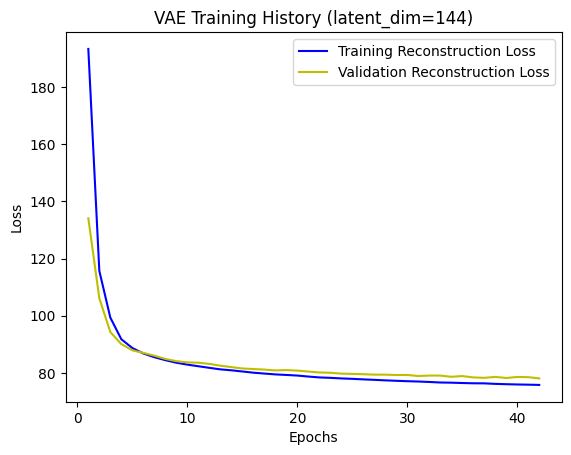

In [ ]:
#2c.11 Plot training history (van Run #5)
# Extract epochs
epochs = range(1, len(hist['reconstruction_loss']) + 1)

# Plot reconstruction loss
plt.plot(epochs, hist['reconstruction_loss'], 'b-', label='Training Reconstruction Loss')
plt.plot(epochs, hist['val_reconstruction_loss'], 'y-', label='Validation Reconstruction Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'VAE Training History (latent_dim={latent_dim})')
plt.legend()
plt.show()


In [ ]:
#2c.12 Encode and decode some digits (Van Run #5)
latent, _ = vae.encoder.predict(x_train)
xnew = vae.decoder.predict(latent)


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step


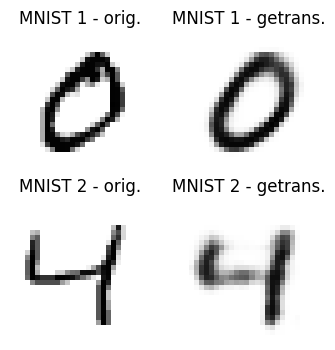

In [ ]:
#2c.13 Plot original and reconstructed digits (Van Run #5)
plt.figure(figsize = (4,4))
plt.subplot(2,2,1)
plt.imshow(1-x_train[1].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - orig.')
plt.subplot(2,2,2)
plt.imshow(1-xnew[1,:,:,0], cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 1 - getrans.')
plt.subplot(2,2,3)
plt.imshow(1-x_train[2].reshape(28,28), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - orig.')
plt.subplot(2,2,4)
plt.imshow(1-xnew[2,:,:,0], cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('MNIST 2 - getrans.')
plt.show()

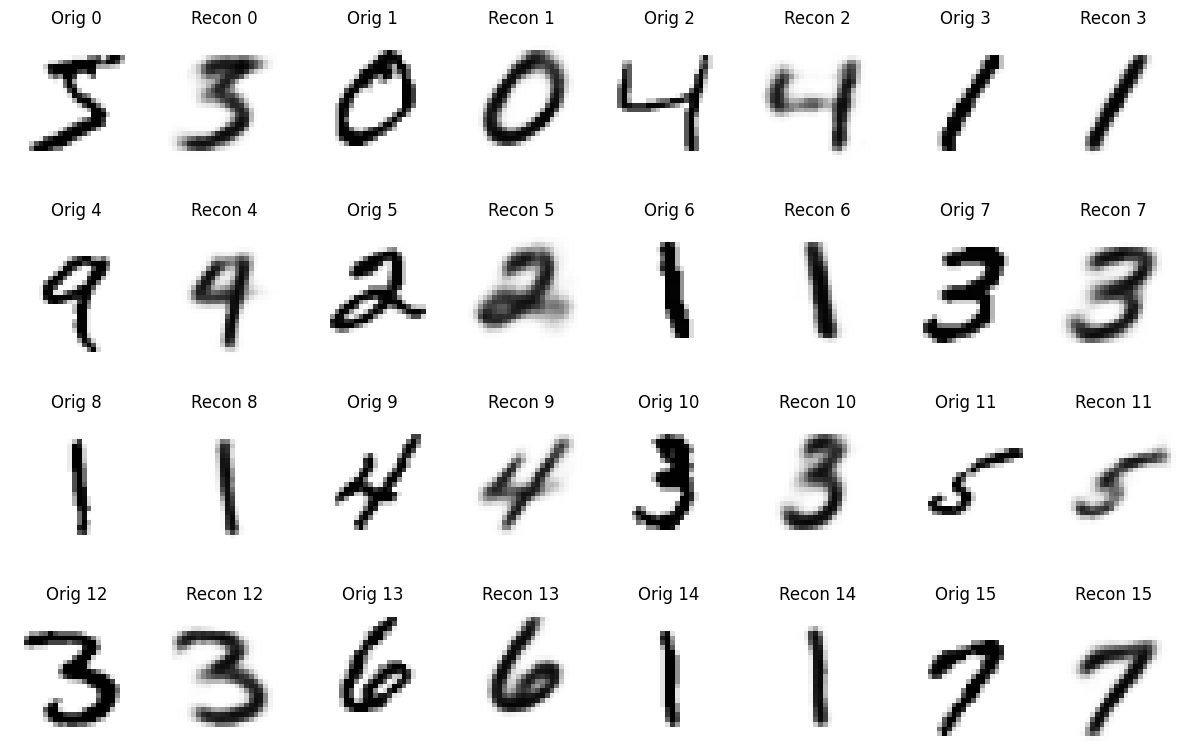

In [ ]:
#2c.14 Plot multiple original and reconstructed digits (Van Run #5)
num_images = 16
plt.figure(figsize=(12, 8))

for i in range(num_images):
    # Original
    plt.subplot(4, 8, 2*i + 1)
    plt.imshow(1 - x_train[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Orig {i}')

    # Reconstructed
    plt.subplot(4, 8, 2*i + 2)
    plt.imshow(1 - xnew[i,:,:,0], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Recon {i}')

plt.tight_layout()
plt.show()

> Eind Conclusie VAE

> Eerste Iteratie (A)

Ik heb in de eerste iteratie de code van Robert gerund en zo een `val_reconstruction_loss` van 150.5138 behaald op epoch 10. 

> Tweede Iteratie (B)

Vervolgens heb ik in de tweede iteratie grid search toegepast om zo de beste waarde te vinden voor `latent_dim`. Uit mijn test kwam `latent_dim=144` naar voren met een `val_reconstruction_loss=77.3466` op epoch 10. 

> Derde Iteratie (C)

Ten slotte heb ik in de derde iteratie geprobeerd om te kijken of we dit model verder kunnen verbeteren met meer epochs met gebruik van early stopping, maar ik had in de derde iteratie in de code het model ge-overwrite met een nieuw model waardoor ik het model uit de tweede iteratie niet meer kon verder trainen. 

Wel heb ik in de derde iteratie vernomen dat een model inderdaad na epoch 10 nog verder kan verbeteren. Bat baseer ik op het feit dat alle 5 modellen die ik heb getraind in mijn derde iteratie nog verbeterden na epoch 10. In de tabel hieronder zien we de eerste 3 epochs, epoch 10, de beste epoch en het verschil tussen epoch 10 en de beste epoch. We kunnen zien dat elk model na epoch 10 nog ongeveer 4.0 tot 5.5 verbetert in `val_reconstruction_loss`. Hiermee kun je dus ongeveer een schatting maken met hoe goed het model in de tweede iteratie had kunnen worden, namelijk ergens tussen `73.3466` en `71.8466`.

**Tabel met val_reconstruction_loss per epoch met latent_dim=144**
| Codeblock | Epoch 1 | Epoch 2 | Epoch 3 | Epoch 10 | Best Epoch after 10 | Gain between Epoch 10 and Best Epoch |
|-|-|-|-|-|-|-|
|2b.10   |129.8725 | 101.1342 | 88.2294 | 77.7364 | - | - |
|2c.10.1 |130.2243 | 103.3495 | 97.1336 | 87.3058 | 82.8221 (Epoch 35) | 4.4837 |
|2c.10.2 |133.4205 | 111.2772 | 99.9771 | 87.8016 | 82.5975 (Epoch 27) | 5.2059 |
|2c.10.3 |140.0064 | 117.6869 | 112.4431| 98.3288 | 92.7702 (Epoch 37) | 5.5586 |
|2c.10.4 |127.5948 | 101.0588 | 92.7120 | 82.9627 | 78.9193 (Epoch 30) | 4.0434 |
|2c.10.5 |134.0977 | 106.1220 | 94.2928 | 83.6813 | 78.2736 (Epoch 37) | 5.4077 |

Als ik zo kijk naar deze data, heb ik een idee hoe ik nog een beter model zou kunnen trainen. Ik zou in princiepe een nieuw model kunnen trainen en een eis stellen dat bij epoch 3 de `val_reconstruction_loss` onder 90 moet zitten, is dat niet, dan automatisch opnieuw een model definieren en opnieuw trainen. Want het lijkt dat hoe lager de `val_reconstruction_loss` bij epoch 3 is, hoe lager die bij epoch 10 is, en hoe lager die uiteindelijk wordt.

#### Deel 2d. Eerste Iteratie op VAE+Classifier
*Zo simpel mogelijke classifier trainen op encoded vectors van images (Baseline Classifier)*

In [59]:
#2d.1 Data Inladen 
import pickle

with open('data_2b.pkl', 'rb') as file:
    x_labeled, y_labeled, x_unlabeled = pickle.load(file)

# classes checken
print(len(set(y_train)))

10


In [60]:
#2d.2 Split Data
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(
    x_labeled, y_labeled, test_size=0.3, random_state=42, stratify=y_labeled
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", len(x_train))
print("Validation:", len(x_val))
print("Test:", len(x_test))


Train: 175
Validation: 37
Test: 38


In [ ]:
#2d.3 data encoden naar vectors
z_train, _ = vae.encoder.predict(x_train)
z_val, _   = vae.encoder.predict(x_val)
z_test, _  = vae.encoder.predict(x_test)

# kijken hoe zo een vector eruit ziet
print(z_train[0].shape)
z_train[0]


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(144,)


array([-1.39819169e+00,  1.63954091e+00,  1.28663886e+00, -2.08191082e-01,
        9.84066725e-01, -6.82596192e-02,  3.82956564e-01, -1.21938860e+00,
        1.37045503e-01,  7.97279954e-01, -3.02054465e-01,  1.25533712e+00,
       -1.83088565e+00,  3.61980438e-01, -1.34786129e-01, -1.46620417e+00,
        6.30700827e-01, -6.86703384e-01, -6.99047819e-02, -1.38730204e+00,
        2.15382874e-03,  3.35009769e-02, -2.01708004e-01, -8.27491879e-01,
        7.45181262e-01, -6.66714251e-01, -1.47418782e-01,  5.40078163e-01,
        1.33598268e+00, -6.70022368e-01, -3.20303887e-01,  2.09564090e+00,
        3.55493605e-01,  1.41039062e+00, -1.17454827e-02,  1.75509739e+00,
       -2.65008509e-02,  1.39535591e-01, -1.79110706e+00, -9.47037190e-02,
       -1.50689554e+00,  1.26695204e+00,  1.75504178e-01, -2.20826316e+00,
       -5.16514599e-01,  7.14429080e-01, -1.22513577e-01, -1.16831136e+00,
        6.34825975e-02, -3.13604832e-01, -5.82586050e-01,  5.30379891e-01,
        7.56795183e-02, -

In [ ]:
#2d.4 Classifier Definiëren
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

num_classes = len(set(y_train))

# simpele classifier
classifier = Sequential([
    Dense(num_classes, activation='softmax', input_shape=(latent_dim,))
])
classifier.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


c:\Users\thezo\anaconda3\envs\ment2b2\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
#2d.5 Train classifier
history = classifier.fit(
    z_train, y_train,
    validation_data=(z_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3200 - loss: 1.8886 - val_accuracy: 0.6757 - val_loss: 1.1186
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7200 - loss: 0.9094 - val_accuracy: 0.7297 - val_loss: 0.8082
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8229 - loss: 0.6380 - val_accuracy: 0.8919 - val_loss: 0.5769
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8400 - loss: 0.5758 - val_accuracy: 0.9189 - val_loss: 0.4615
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8286 - loss: 0.5289 - val_accuracy: 0.8919 - val_loss: 0.4580
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8457 - loss: 0.5112 - val_accuracy: 0.9189 - val_loss: 0.4193
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8571 - loss: 0.4723 - val_accuracy: 0.9459 - val_loss: 0.3704
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8686 - loss: 0.4593 - val_accuracy: 0.8919 - val_loss: 0.3935
Epoch 9/20
6

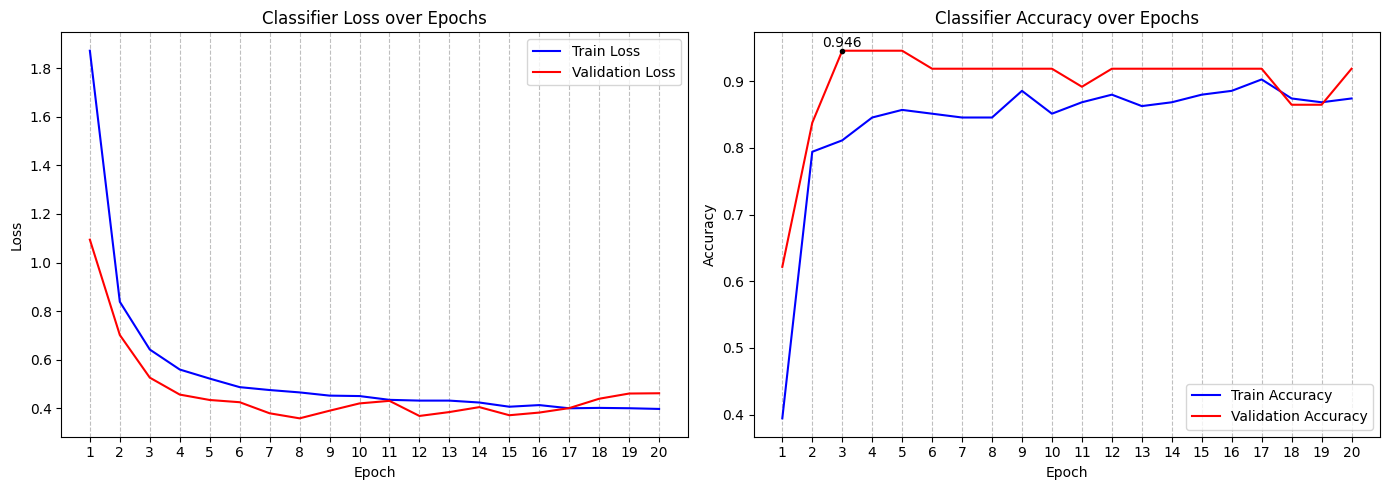

In [135]:
#2d.6.1 plot training 
import matplotlib.pyplot as plt
import numpy as np

epochs = range(1, len(history.history['loss']) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns

# ---- Left plot: Loss ----
ax1.plot(epochs, history.history['loss'], 'b-', label='Train Loss')
ax1.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Classifier Loss over Epochs')
ax1.set_xticks(epochs)
ax1.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax1.legend()

# ---- Right plot: Accuracy ----
val_acc = np.array(history.history['val_accuracy'])
max_idx = val_acc.argmax()
max_epoch = epochs[max_idx]
max_val_acc = val_acc[max_idx]

ax2.plot(epochs, history.history['accuracy'], 'b-', label='Train Accuracy')
ax2.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
ax2.plot(max_epoch, max_val_acc, 'ko', markersize=3)  # marker on best val acc
ax2.text(max_epoch, max_val_acc + 0.001, f'{max_val_acc:.3f}', ha='center', va='bottom')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Classifier Accuracy over Epochs')
ax2.set_xticks(epochs)
ax2.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

> Tussen Opmerking

We behalen een accuracy van 0.946. Ik ga nog 2 keer het model opnieuw definieren en kijken of ik een hogere accruacy kan halen. Dit doe ik om een idee te krijgen wat een beetje het gemiddelde accuracy is dat je krijgt, zodat ik later sterkere vergelijkingen kan maken.

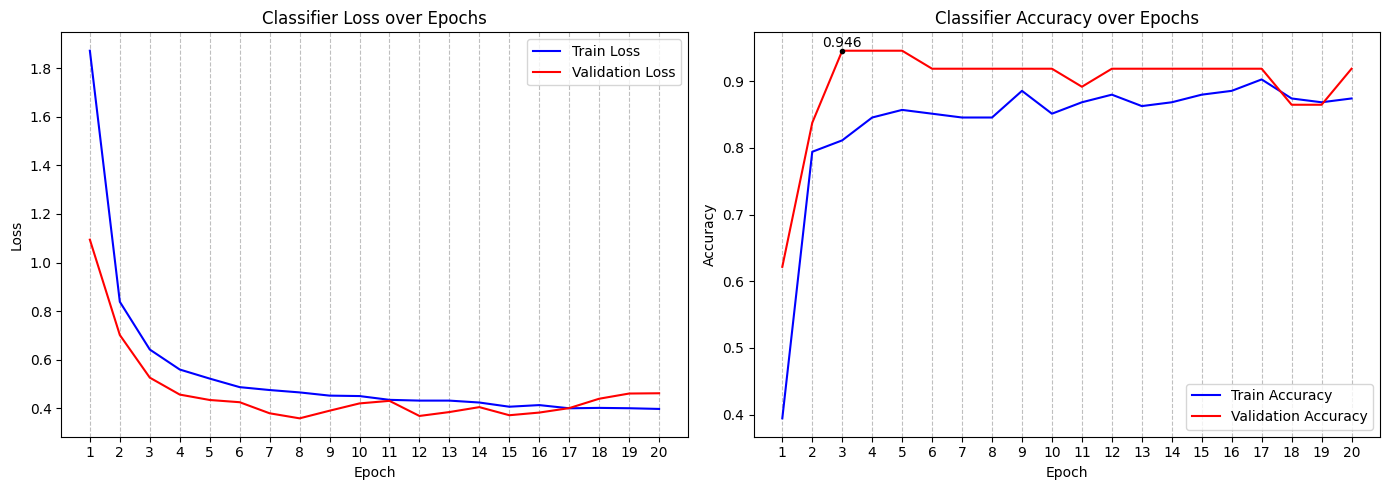

In [134]:
#2d.4 Classifier Definiëren t/m 2d.6.2 Plot Training (Run #2)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

num_classes = len(set(y_train))

# simpele classifier
classifier = Sequential([
    Dense(num_classes, activation='softmax', input_shape=(latent_dim,))
])
classifier.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#2d.5 Train classifier
history = classifier.fit(
    z_train, y_train,
    validation_data=(z_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=0
)
#2d.6.2 plot training 
import matplotlib.pyplot as plt
import numpy as np

epochs = range(1, len(history.history['loss']) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns

# ---- Left plot: Loss ----
ax1.plot(epochs, history.history['loss'], 'b-', label='Train Loss')
ax1.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Classifier Loss over Epochs')
ax1.set_xticks(epochs)
ax1.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax1.legend()

# ---- Right plot: Accuracy ----
val_acc = np.array(history.history['val_accuracy'])
max_idx = val_acc.argmax()
max_epoch = epochs[max_idx]
max_val_acc = val_acc[max_idx]

ax2.plot(epochs, history.history['accuracy'], 'b-', label='Train Accuracy')
ax2.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
ax2.plot(max_epoch, max_val_acc, 'ko', markersize=3)  # marker on best val acc
ax2.text(max_epoch, max_val_acc + 0.001, f'{max_val_acc:.3f}', ha='center', va='bottom')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Classifier Accuracy over Epochs')
ax2.set_xticks(epochs)
ax2.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

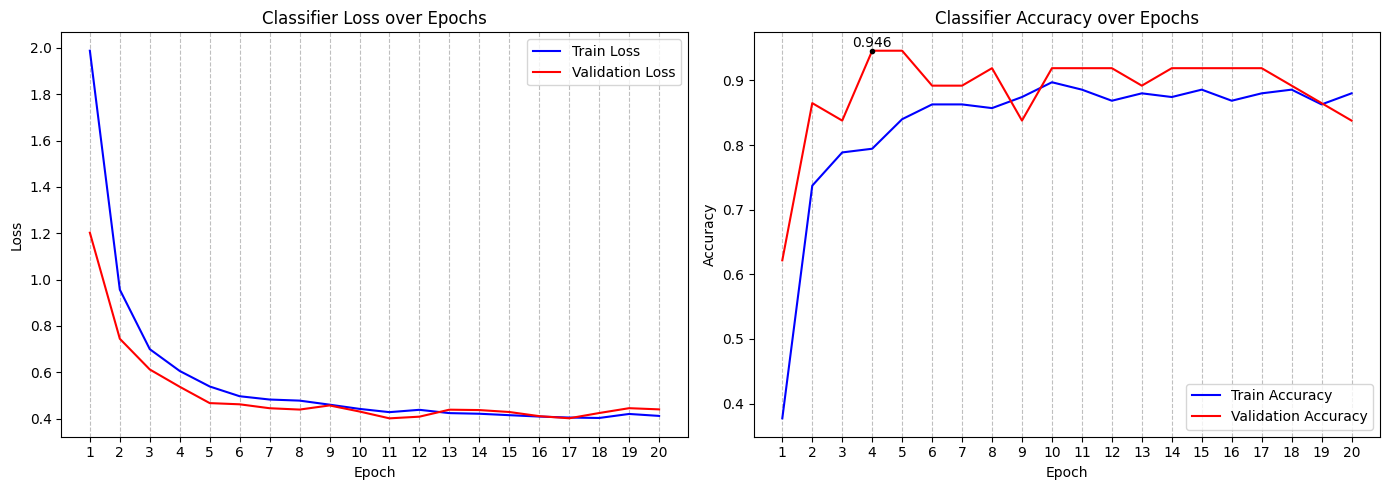

In [133]:
#2d.4 Classifier Definiëren t/m 2d.6.3 Plot Training (Run #3)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

num_classes = len(set(y_train))

# simpele classifier
classifier = Sequential([
    Dense(num_classes, activation='softmax', input_shape=(latent_dim,))
])
classifier.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#2d.5 Train classifier
history = classifier.fit(
    z_train, y_train,
    validation_data=(z_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=0
)
#2d.6.3 plot training 
import matplotlib.pyplot as plt
import numpy as np

epochs = range(1, len(history.history['loss']) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns

# ---- Left plot: Loss ----
ax1.plot(epochs, history.history['loss'], 'b-', label='Train Loss')
ax1.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Classifier Loss over Epochs')
ax1.set_xticks(epochs)
ax1.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax1.legend()

# ---- Right plot: Accuracy ----
val_acc = np.array(history.history['val_accuracy'])
max_idx = val_acc.argmax()
max_epoch = epochs[max_idx]
max_val_acc = val_acc[max_idx]

ax2.plot(epochs, history.history['accuracy'], 'b-', label='Train Accuracy')
ax2.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
ax2.plot(max_epoch, max_val_acc, 'ko', markersize=3)  # marker on best val acc
ax2.text(max_epoch, max_val_acc + 0.001, f'{max_val_acc:.3f}', ha='center', va='bottom')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Classifier Accuracy over Epochs')
ax2.set_xticks(epochs)
ax2.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

> Conclusie Eerste Iteratie op VAE+Classifier (D)

Het valt me op dat met een erg simpele classifier het model al erg hoog scoort (0.946). Dit is eigenlijk wel logisch aangezien de VAE uitgebreid getrained is en de features extract voor de classifier. Ik heb het model 3x vanaf begin aangemaakt en gerund en alle 3 keer kreeg ik de accruacy 0.946. betekenend dat 0.946 de gemmidelde accuracy is met een zo simpel mogelijk classifier.

> Volgende Stap

Ik denk eigenlijk niet dat het nog echt mogelijk is om betere resultaten te krijgen door de classifier aan te passen, aangezien je dan gaat spelen met de feature extraction van de VAE. Ook al klinkt het niet logisch in mijn hoofd, is het toch een iteratie proberen waard.

#### Deel 2e. Tweede Iteratie op VAE+Classifier
*Dense laag toevoegen aan classifier om de baseline classifier te verbeteren* 

In [137]:
#2e.1 Classifier Definiëren (Dense laag erbij)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

num_classes = len(set(y_train))

# simpele classifier
classifier = Sequential([
    Dense(32, activation='relu', input_shape=(latent_dim,)),
    Dense(num_classes, activation='softmax')
])
classifier.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)




In [138]:
#2e.2 Train classifier
history = classifier.fit(
    z_train, y_train,
    validation_data=(z_val, y_val),
    epochs=20,
    batch_size=32
)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3314 - loss: 1.9326 - val_accuracy: 0.6216 - val_loss: 1.1030
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6914 - loss: 0.9378 - val_accuracy: 0.8919 - val_loss: 0.6033
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8057 - loss: 0.5973 - val_accuracy: 0.8378 - val_loss: 0.4431
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8286 - loss: 0.4730 - val_accuracy: 0.9189 - val_loss: 0.3974
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8343 - loss: 0.4383 - val_accuracy: 0.9189 - val_loss: 0.3935
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8514 - loss: 0.3672 - val_accuracy: 0.9189 - val_loss: 0.3341
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8971 - loss: 0.2906 - val_accuracy: 0.8649 - val_loss: 0.3843
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9029 - loss: 0.2617 - val_accuracy: 0.8649 - val_loss: 0.3667


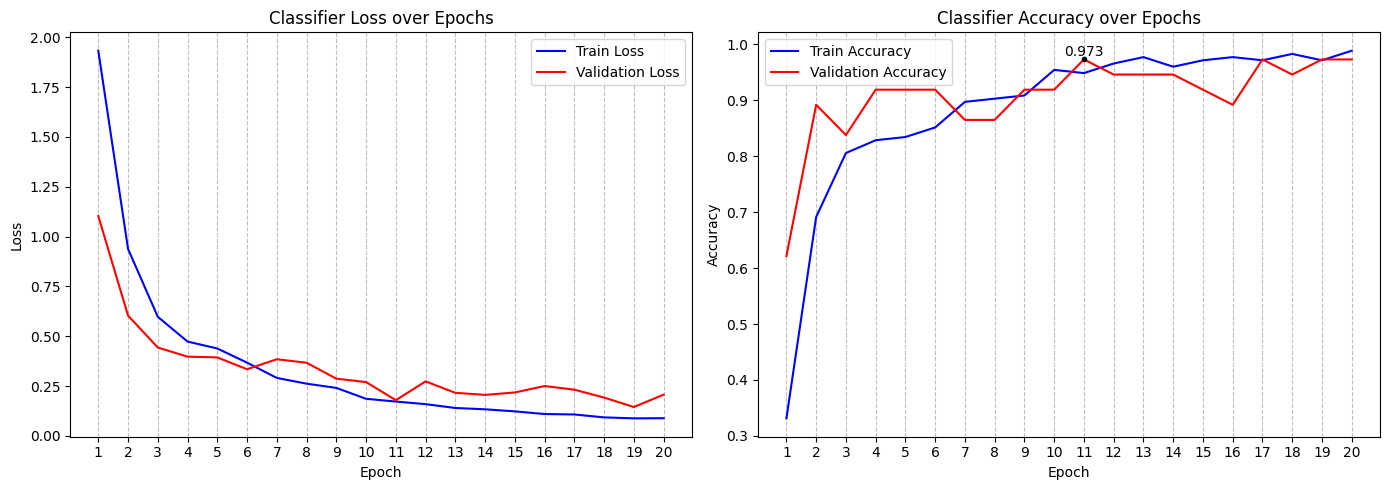

In [139]:
#2e.3 plot training 
import matplotlib.pyplot as plt
import numpy as np

epochs = range(1, len(history.history['loss']) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns

# ---- Left plot: Loss ----
ax1.plot(epochs, history.history['loss'], 'b-', label='Train Loss')
ax1.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Classifier Loss over Epochs')
ax1.set_xticks(epochs)
ax1.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax1.legend()

# ---- Right plot: Accuracy ----
val_acc = np.array(history.history['val_accuracy'])
max_idx = val_acc.argmax()
max_epoch = epochs[max_idx]
max_val_acc = val_acc[max_idx]

ax2.plot(epochs, history.history['accuracy'], 'b-', label='Train Accuracy')
ax2.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
ax2.plot(max_epoch, max_val_acc, 'ko', markersize=3)  # marker on best val acc
ax2.text(max_epoch, max_val_acc + 0.001, f'{max_val_acc:.3f}', ha='center', va='bottom')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Classifier Accuracy over Epochs')
ax2.set_xticks(epochs)
ax2.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

In [233]:
#2e.1.2 Classifier Definiëren (Dense laag erbij)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

num_classes = len(set(y_train))

# simpele classifier
classifier_100 = Sequential([
    Dense(32, activation='relu', input_shape=(latent_dim,)),
    Dense(num_classes, activation='softmax')
])
classifier_100.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)




In [234]:
#2e.2.2 Train classifier
history = classifier_100.fit(
    z_train, y_train,
    validation_data=(z_val, y_val),
    epochs=20,
    batch_size=32
)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3886 - loss: 1.8393 - val_accuracy: 0.6216 - val_loss: 1.0513
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7029 - loss: 0.9313 - val_accuracy: 0.7568 - val_loss: 0.6573
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8171 - loss: 0.5895 - val_accuracy: 0.9459 - val_loss: 0.3802
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8457 - loss: 0.4385 - val_accuracy: 0.9189 - val_loss: 0.3072
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8971 - loss: 0.3497 - val_accuracy: 0.8919 - val_loss: 0.2810
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9200 - loss: 0.2909 - val_accuracy: 0.8378 - val_loss: 0.2933
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9200 - loss: 0.2425 - val_accuracy: 0.8919 - val_loss: 0.2606
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9314 - loss: 0.2246 - val_accuracy: 0.9189 - val_loss: 0.2337


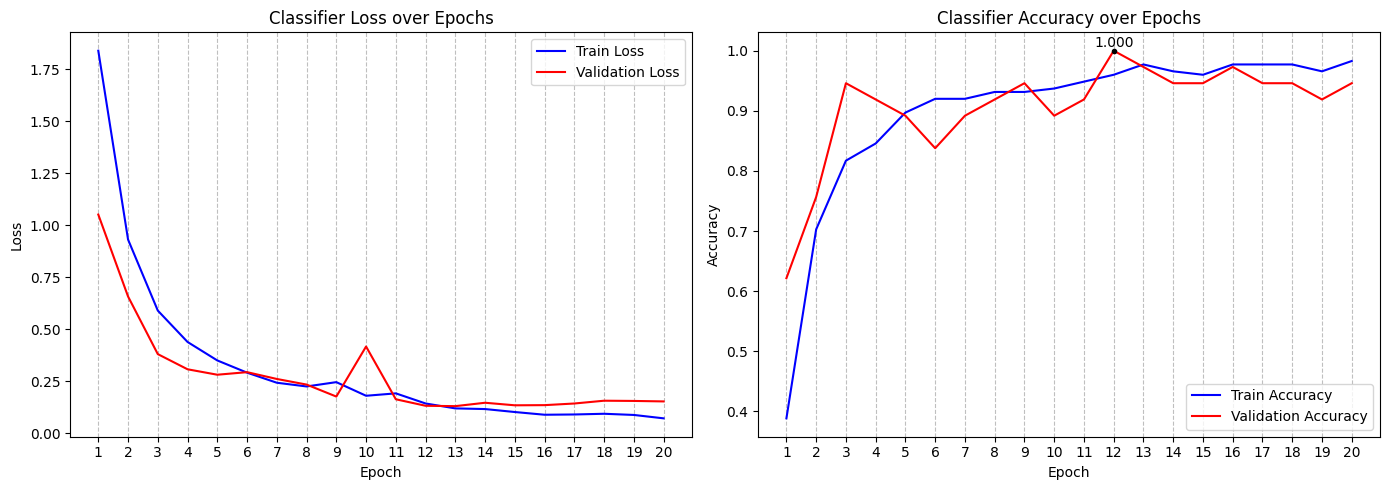

In [235]:
#2e.3.2 plot training 
import matplotlib.pyplot as plt
import numpy as np

epochs = range(1, len(history.history['loss']) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns

# ---- Left plot: Loss ----
ax1.plot(epochs, history.history['loss'], 'b-', label='Train Loss')
ax1.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Classifier Loss over Epochs')
ax1.set_xticks(epochs)
ax1.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax1.legend()

# ---- Right plot: Accuracy ----
val_acc = np.array(history.history['val_accuracy'])
max_idx = val_acc.argmax()
max_epoch = epochs[max_idx]
max_val_acc = val_acc[max_idx]

ax2.plot(epochs, history.history['accuracy'], 'b-', label='Train Accuracy')
ax2.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
ax2.plot(max_epoch, max_val_acc, 'ko', markersize=3)  # marker on best val acc
ax2.text(max_epoch, max_val_acc + 0.001, f'{max_val_acc:.3f}', ha='center', va='bottom')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Classifier Accuracy over Epochs')
ax2.set_xticks(epochs)
ax2.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

In [158]:
#2e.1.3 Classifier Definiëren (Dense laag erbij)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

num_classes = len(set(y_train))

# simpele classifier
classifier = Sequential([
    Dense(32, activation='relu', input_shape=(latent_dim,)),
    Dense(num_classes, activation='softmax')
])
classifier.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)




In [159]:
#2e.2.3 Train classifier
history = classifier.fit(
    z_train, y_train,
    validation_data=(z_val, y_val),
    epochs=20,
    batch_size=32
)


Epoch 1/20


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3657 - loss: 1.8323 - val_accuracy: 0.6486 - val_loss: 0.9903
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7600 - loss: 0.8031 - val_accuracy: 0.7838 - val_loss: 0.6562
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8457 - loss: 0.5209 - val_accuracy: 0.8649 - val_loss: 0.5197
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8400 - loss: 0.4467 - val_accuracy: 0.8919 - val_loss: 0.4546
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8743 - loss: 0.3762 - val_accuracy: 0.9189 - val_loss: 0.3438
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8914 - loss: 0.3250 - val_accuracy: 0.9189 - val_loss: 0.3097
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9314 - loss: 0.2588 - val_accuracy: 0.8919 - val_loss: 0.3426
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9257 - loss: 0.2498 - val_accuracy: 0.8919 - val_loss: 0.2473
Epoch 9/20


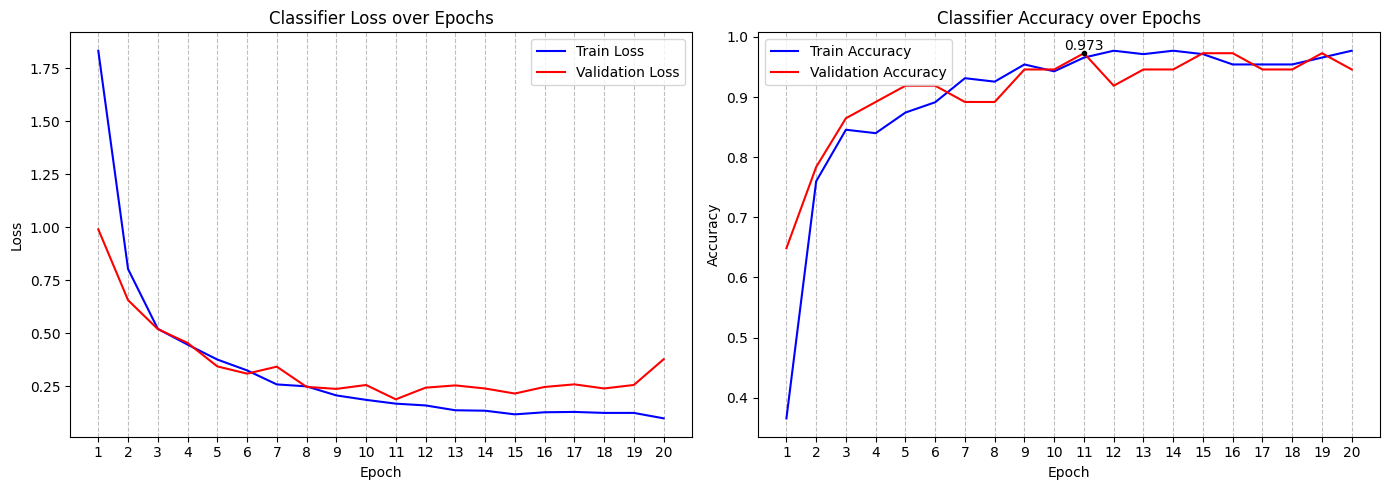

In [160]:
#2e.3.3 plot training 
import matplotlib.pyplot as plt
import numpy as np

epochs = range(1, len(history.history['loss']) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns

# ---- Left plot: Loss ----
ax1.plot(epochs, history.history['loss'], 'b-', label='Train Loss')
ax1.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Classifier Loss over Epochs')
ax1.set_xticks(epochs)
ax1.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax1.legend()

# ---- Right plot: Accuracy ----
val_acc = np.array(history.history['val_accuracy'])
max_idx = val_acc.argmax()
max_epoch = epochs[max_idx]
max_val_acc = val_acc[max_idx]

ax2.plot(epochs, history.history['accuracy'], 'b-', label='Train Accuracy')
ax2.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
ax2.plot(max_epoch, max_val_acc, 'ko', markersize=3)  # marker on best val acc
ax2.text(max_epoch, max_val_acc + 0.001, f'{max_val_acc:.3f}', ha='center', va='bottom')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Classifier Accuracy over Epochs')
ax2.set_xticks(epochs)
ax2.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

> Conclusie Tweede Iteratie op VAE+Classifier (E)

Dit is indrukwekkend om te zien. we scoren 2 keer 0.973, en een keer 1.000. Toch nog een duidelijke verbetering met gebruik van een dense laag.

> Volgende Stap

Ik denk dat ik het hierbij laat. Het voelt alsof ik de opdracht heb uitgespeeld. Ik ga het model met 1.000 accuracy op de validatie set verder gebruiken om te evalueren in deel 3.

### Deel 3

Evalueer je model.

#### Deel 3a. VAE - Evaluatie

Hieronder toon ik plots die je al eerder voorbij hebt zien komen. Ik heb de codecellen gekopierd uit hun eigen secties om ze hier bij de evaluatie te laten zien.

Hieronder in #2b.14 zien we images met een `val_reconstruction_loss` van `77.3466` (10 epochs). Ook hieronder zie je #2c.14, hier heeft het model een `val_reconstruction_loss` van `78.2736` (37 epochs). Het model in #2b.14 heeft een iets lagere loss score behaald dan het model in #2c.14. Als we kijken naar de plaatjes dan zien de plaatjes van #2c.14 er een stukje waziger uit dan de plaatjes in #2b.14. Ik zou aannemen dat dat dan komt door mogelijke overfitting op het model met 37 epochs (#2c.14). 

Het jammere aan deze opdracht is dat ik niks heb opgeslagen tussendoors wat een goede les is voor de volgende keer. Daarom heb ik uitieindelijk maar model #2c.14 met 37 epochs gebruikt verder in de classifier. Ik weet wel bijna zeker dat als ik het model van #2b.14 in de classifier had gebruikt dat de scores uiteindelijk nog hoger hadden kunnen zijn.

Ook denk ik dat ik betere scores had kunnen halen als ik de VAE van #2c.14 iets minder epochs getraind had. Maar het is wat het is, mijn uitwerking van deze opdracht komt elke keer eigenlijk neer bij het feit dat ik tussendoors modellen moet opslaan.

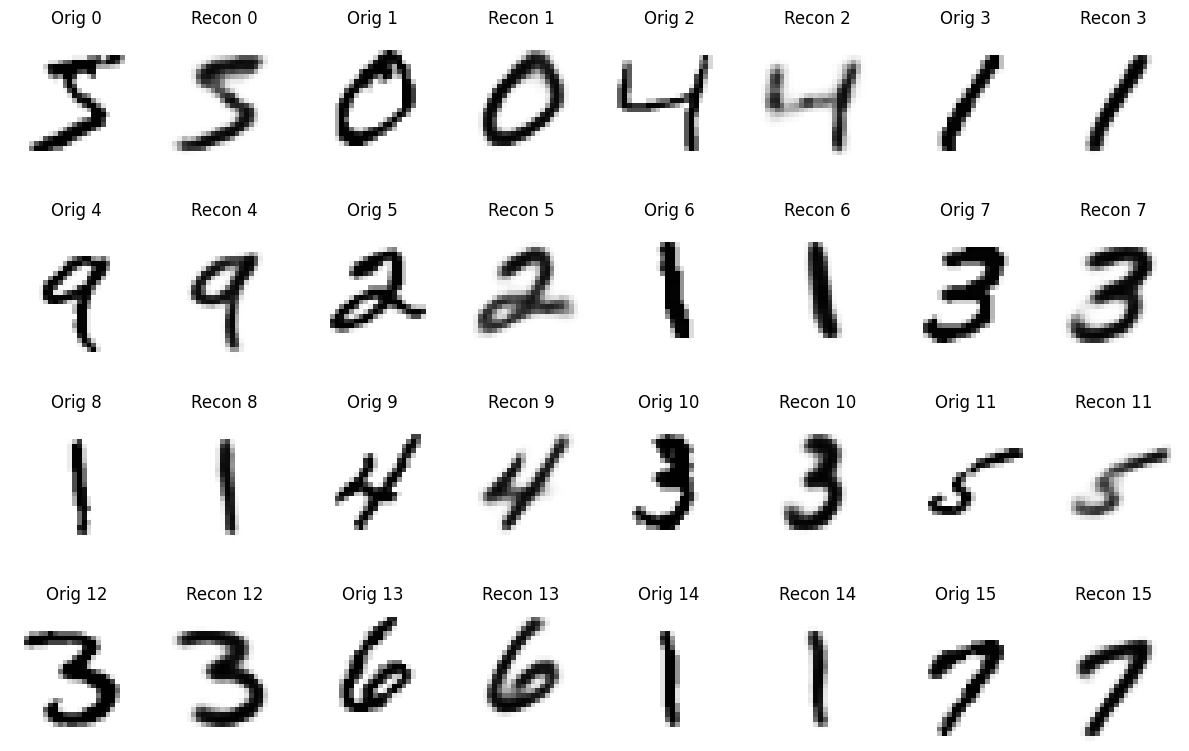

In [ ]:
#2b.14 Plot multiple original and reconstructed digits (Kopie)
num_images = 16
plt.figure(figsize=(12, 8))

for i in range(num_images):
    # Original
    plt.subplot(4, 8, 2*i + 1)
    plt.imshow(1 - x_train[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Orig {i}')

    # Reconstructed
    plt.subplot(4, 8, 2*i + 2)
    plt.imshow(1 - xnew[i,:,:,0], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Recon {i}')

plt.tight_layout()
plt.show()

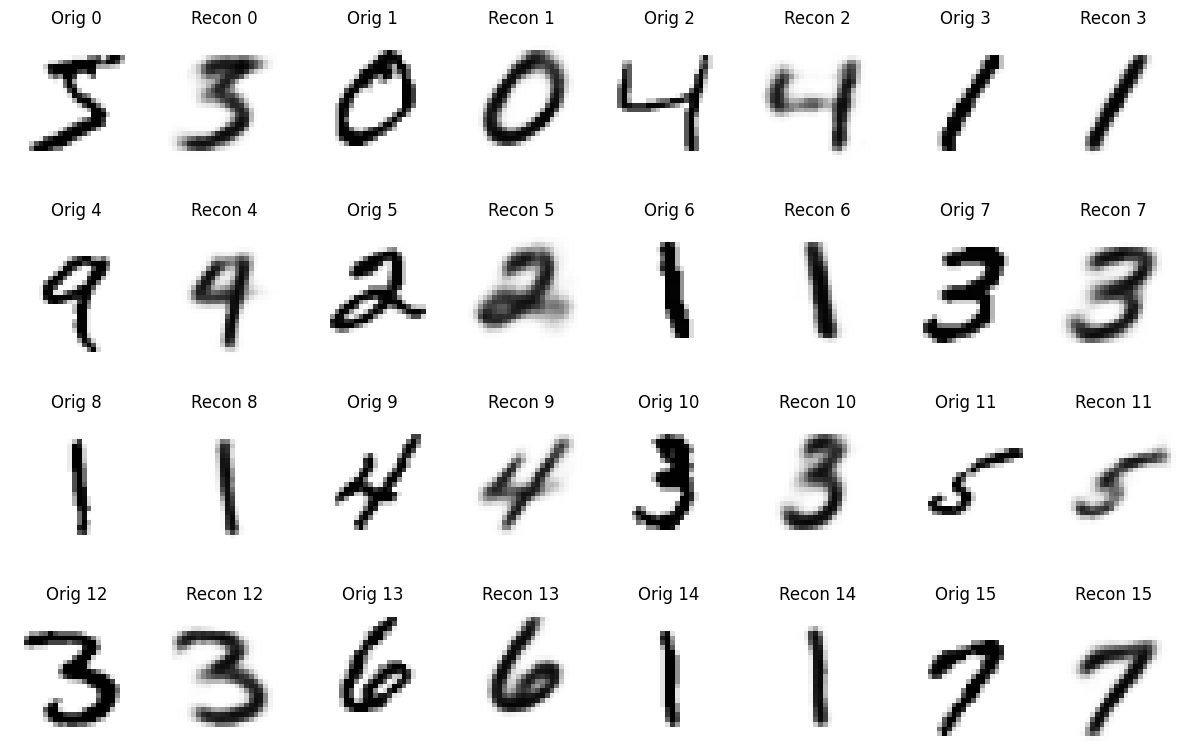

In [ ]:
#2c.14 Plot multiple original and reconstructed digits (Kopie)
num_images = 16
plt.figure(figsize=(12, 8))

for i in range(num_images):
    # Original
    plt.subplot(4, 8, 2*i + 1)
    plt.imshow(1 - x_train[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Orig {i}')

    # Reconstructed
    plt.subplot(4, 8, 2*i + 2)
    plt.imshow(1 - xnew[i,:,:,0], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Recon {i}')

plt.tight_layout()
plt.show()

#### Deel 3b. VAE+Classifier - Train en Val set - Evaluatie

We hebben in 2e.3.2 (zie hieronder 2e.3.2) al geËvalueerd op deze sets en ook recent besproken, maar voor de vorm zijn ze hier nogmaals

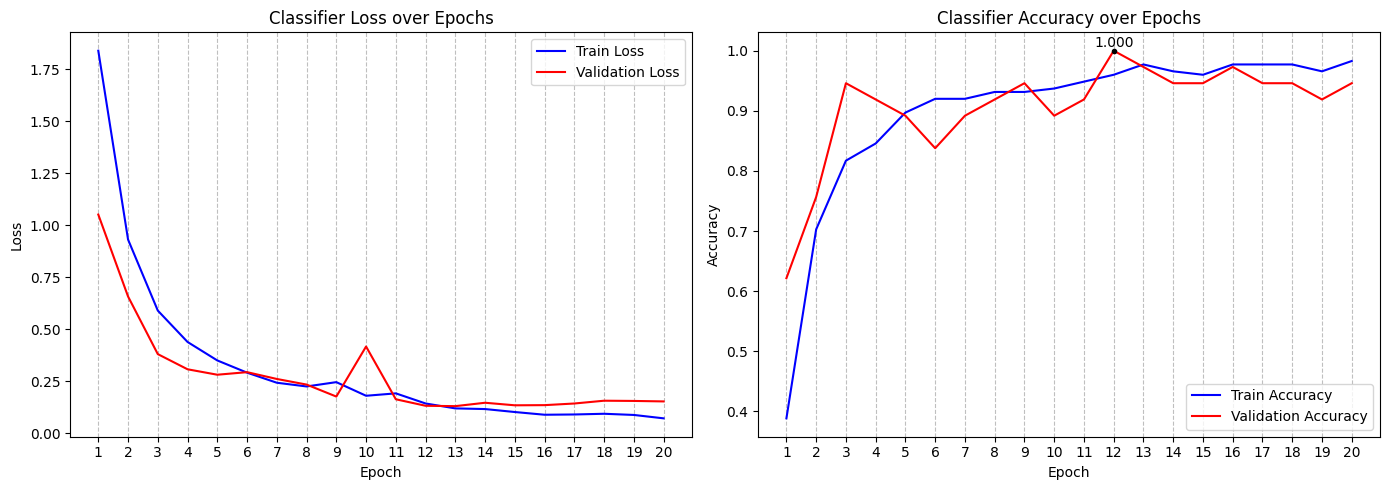

In [ ]:
#2e.3.2 plot training (Kopie)
import matplotlib.pyplot as plt
import numpy as np

epochs = range(1, len(history.history['loss']) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns

# ---- Left plot: Loss ----
ax1.plot(epochs, history.history['loss'], 'b-', label='Train Loss')
ax1.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Classifier Loss over Epochs')
ax1.set_xticks(epochs)
ax1.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax1.legend()

# ---- Right plot: Accuracy ----
val_acc = np.array(history.history['val_accuracy'])
max_idx = val_acc.argmax()
max_epoch = epochs[max_idx]
max_val_acc = val_acc[max_idx]

ax2.plot(epochs, history.history['accuracy'], 'b-', label='Train Accuracy')
ax2.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
ax2.plot(max_epoch, max_val_acc, 'ko', markersize=3)  # marker on best val acc
ax2.text(max_epoch, max_val_acc + 0.001, f'{max_val_acc:.3f}', ha='center', va='bottom')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Classifier Accuracy over Epochs')
ax2.set_xticks(epochs)
ax2.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

#### Deel 3c. VAE+Classifier - Train en Val set - Plot

Hier plot ik de train en validatie latent spaces nog met gebruik van PCA (#3.2, #3.3). Dit idee komt uit les 12 Auto Encoders. Ik heb er een schepje bovenop gedaan door er areas van te maken, dit voegt voornamelijk bij de validatie en de test set een waarde toe, aangezien je de punten zo beter uit elkaar kunt houden en gemakkelijker kunt volgen. Of de areas de trainset ook verduidelijken kun je over discusieren maar als je goed kijkt kun je nog wel de lijnen zien. Ik persoonlijk vind het een fijne toevoeging

In [ ]:
#3.1 PCA voor visualisatie
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# terug van 144d naar 2d voor plot
pca = PCA(n_components=2)
pca.fit(z_train)
z_train_2d = pca.transform(z_train)
z_val_2d = pca.transform(z_val)


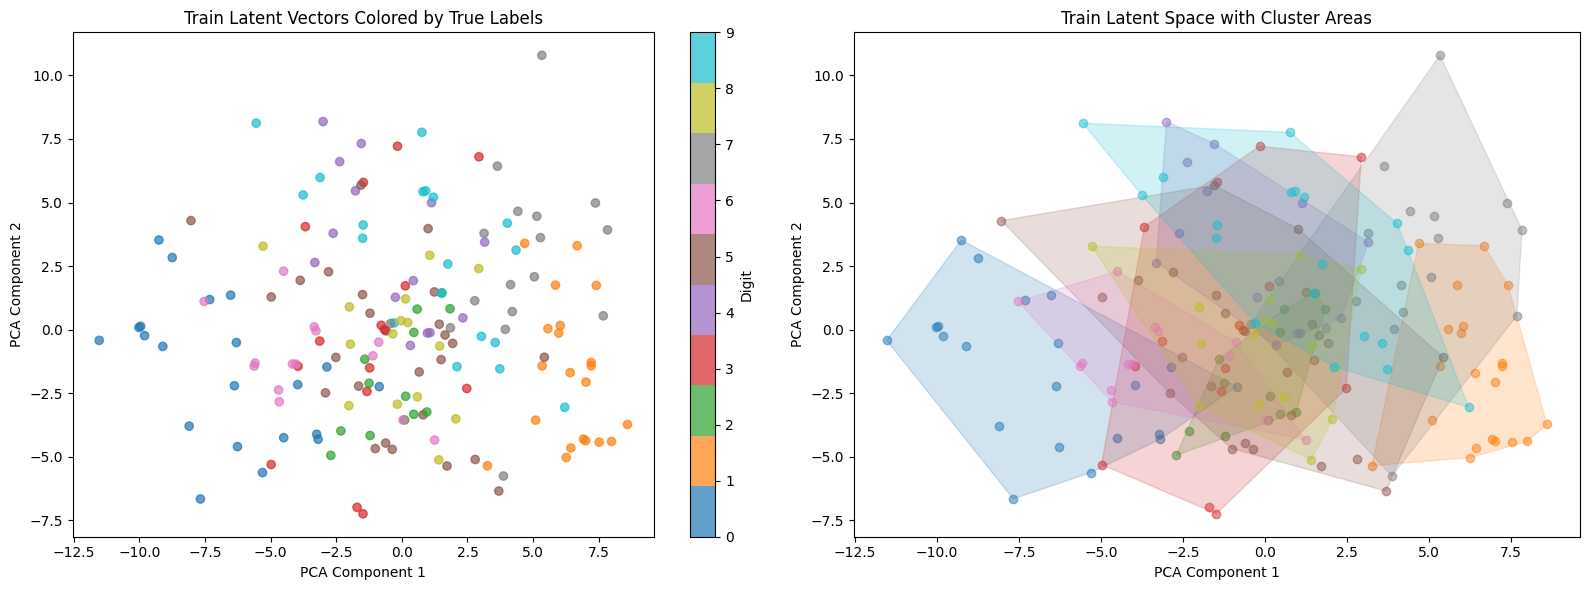

In [ ]:
#3.2 Plot Train latent space met PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

classes = np.unique(y_train)
colors = plt.cm.tab10(np.arange(len(classes)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))  # 1 row, 2 columns

# ------------------- Left plot: simple scatter -------------------
scatter1 = ax1.scatter(
    z_train_2d[:,0], z_train_2d[:,1],
    c=y_train, cmap='tab10', alpha=0.7
)
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_title('Train Latent Vectors Colored by True Labels')
cbar1 = plt.colorbar(scatter1, ax=ax1, ticks=range(len(classes)))
cbar1.set_label('Digit')

# ------------------- Right plot: scatter + convex hulls -------------------
for i, cls in enumerate(classes):
    points = z_train_2d[y_train == cls]
    ax2.scatter(
        points[:,0], points[:,1],
        color=colors[i], alpha=0.5, label=f"Digit {cls}"
    )
    
    # Draw convex hull
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]
        ax2.fill(
            hull_points[:,0], hull_points[:,1],
            color=colors[i], alpha=0.2
        )

ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_title('Train Latent Space with Cluster Areas')

plt.tight_layout()
plt.show()


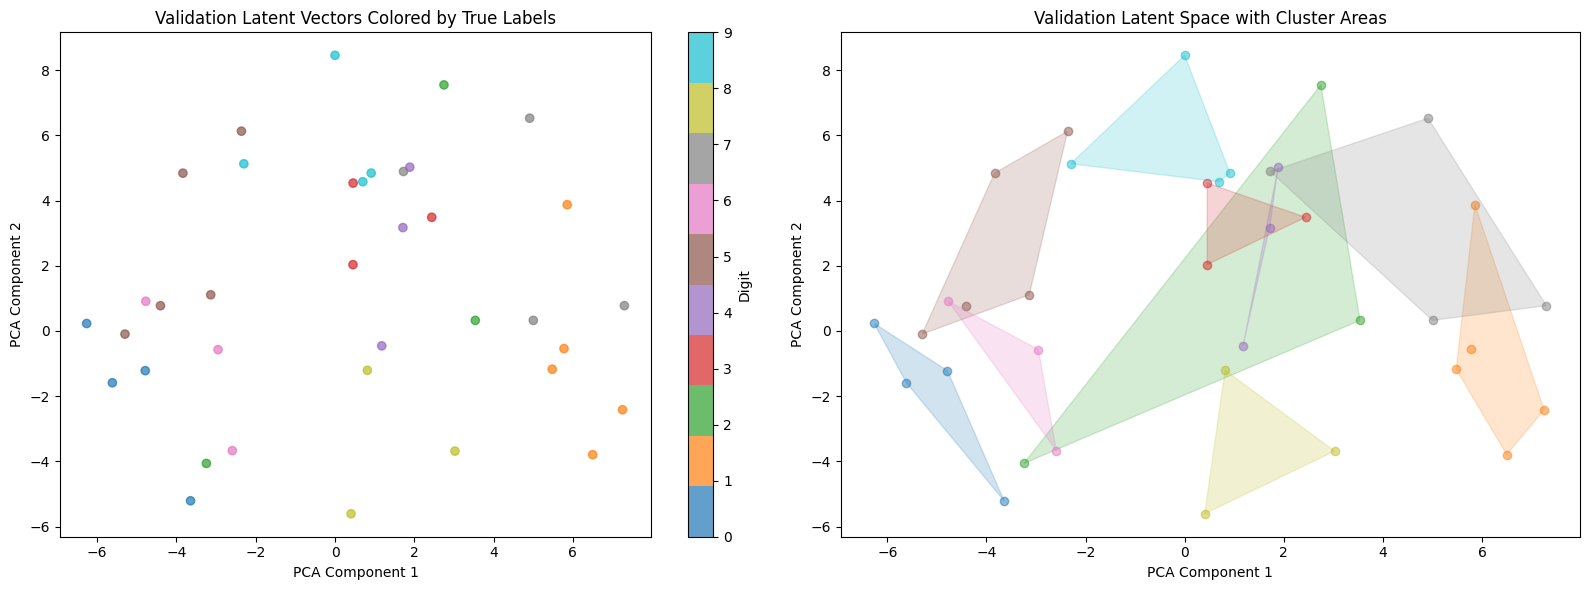

In [ ]:
#3.3 Plot Val latent space met PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

classes = np.unique(y_val)
colors = plt.cm.tab10(np.arange(len(classes)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))  # 1 row, 2 columns

# ------------------- Left plot: simple scatter -------------------
scatter1 = ax1.scatter(z_val_2d[:,0], z_val_2d[:,1], c=y_val, cmap='tab10', alpha=0.7)
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_title('Validation Latent Vectors Colored by True Labels')
cbar1 = plt.colorbar(scatter1, ax=ax1, ticks=range(len(classes)))
cbar1.set_label('Digit')

# ------------------- Right plot: scatter + convex hulls -------------------
for i, cls in enumerate(classes):
    points = z_val_2d[y_val == cls]
    ax2.scatter(points[:,0], points[:,1], color=colors[i], alpha=0.5, label=f"Digit {cls}")
    
    # Draw convex hull
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]
        ax2.fill(hull_points[:,0], hull_points[:,1], color=colors[i], alpha=0.2)

ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_title('Validation Latent Space with Cluster Areas')

plt.tight_layout()
plt.show()


#### Deel 3d. VAE+Classifier - Test Set - Evaluatie

We krijgen een test accruacy van `0.921...` (Codeblock #3.4). Dit is ietsjes lager dan de train en validatie accuracies maar komt er dicht in de buurt. Als we kijken naar de confusion matrix in codeblock #3.5 dan zien we dat alleen het getal 5 verkeerd is ge-predict. Later in codeblock #3.9 laat ik exact zien hoe deze 5'en eruit zien. Bij het plotten probeer ik ook uit te leggen waarom het model dit eventueel fout heeft kunnen predicten.

In [ ]:
#3.4 Evaluate classifier on test set
test_loss, test_acc = classifier_100.evaluate(z_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9211 - loss: 0.2577
Test Loss: 0.25768524408340454
Test Accuracy: 0.9210526347160339


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


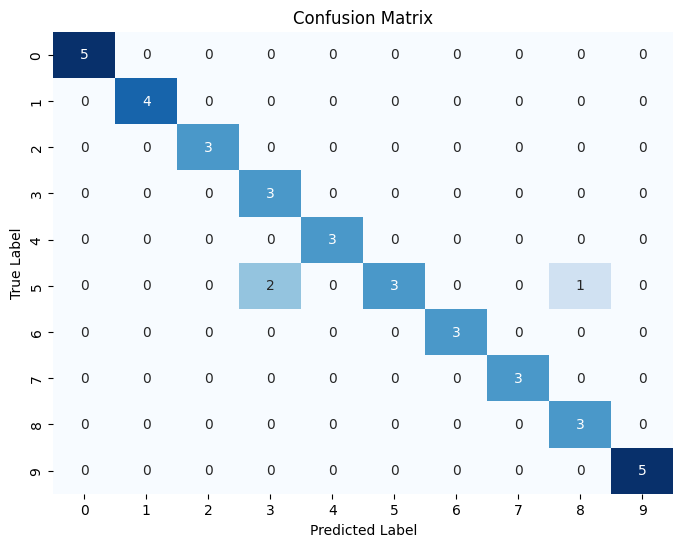

In [ ]:
#3.5 Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict class probabilities
y_pred_probs = classifier_100.predict(z_test)
# Convert to predicted labels
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Deel 3e. VAE+Classifier - Test Set - Plot

Ook de testset kunnen we plotten (Codeblock #3.8). hieruit kunnen we waarnemen dat er getallen zijn die de VAE niet op andere getallen vind lijken. Kijk bijvoorbeeld naar het getal 6, de punten van de scatterplot staan niet dichtbij andere punten. Dit kan indicaten dat de VAE het getal 6 erg duidelijk kan reconstrueren. Hetzelfde geldt voor het getal 0. 

Maar hoe kan het dat de vijven verkeerd gepredict zijn. Als we kijken naar #3.9, dan zijn er 3 vijven die fout gepredict zijn:
- True: 5, Pred: 8 (2.54, -0.44)
- True: 5, Pred: 3 (-1.37, 1.02)
- True: 5, Pred: 3 (3.26, 2.18)

Laten we deze vijven één voor een evalueren. Als we kijken naar de eerste 5 die als een 8 gepredict is, dan zien we eigenlijk op eerste opzicht dat dit best veel op een 9 lijkt. Maar ik heb een idee waarom dit toch als 8 geclassificeerd zou kunnen worden. In #3.6.1 zien we een rood vierkant. Als we kijken in het vierkant dan zien we daar donkergrijze pixels. misschien neemt het model dit mee en maakt het zo een 8 (zie de rode acht die ik erlangs heb getekend)

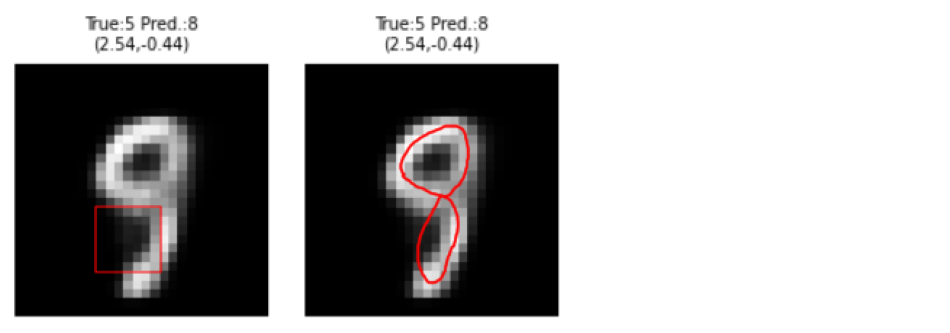

In [16]:
#3.6.1 True 5 Predicted 8
image = plt.imread("Final-1.png")
plt.figure(figsize=(12,12))  # width x height in inches
plt.imshow(image)
plt.axis('off')
plt.show()

De volgende fout van het model op de testset is dat een vijf als 3 wordt geclassificeerd. Als ik mijn ogen dicht knijp en naar het plaatje kijk (#3.6.2) zie ik automatisch een vijf (zoals de rode 5 helemaal rechts), maar als ik in het plaatje een 3 wil zien dan zie ik de 3 in het middelste plaatje. als je je ogen dichtknijpt kunnen je hersenen alternaten tussen deze twee plaatjes. Het zou dus kunnen dat het model ze hierdoor op elkaar vind lijken.

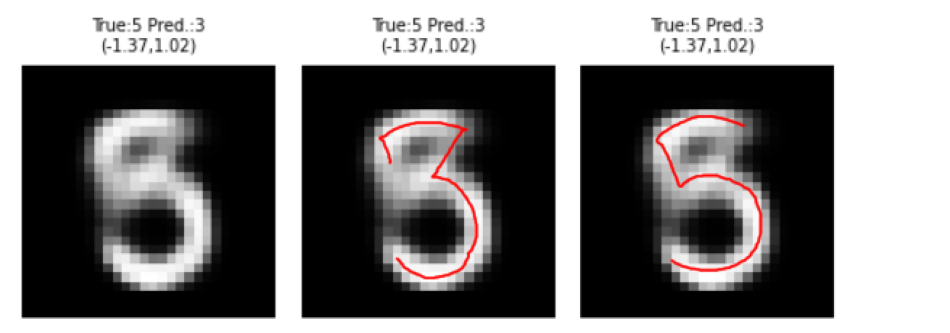

In [20]:
#3.6.2 True 5 Predicted 3 (1)
image = plt.imread("real-final-2.png")
plt.figure(figsize=(12,12))  # width x height in inches
plt.imshow(image)
plt.axis('off')
plt.show()

De laatste fout is weer iets minder voor de hand liggend. Deze vind ik toch erg veel op een vijf lijken (#3.6.3). Maar, als we kijken in het rode vierkantje aan het plaatje helemaal links. Dan zien we dat het verdacht wit is aan de bovenkant, misschien zou dat kunnen suggereren dat er 2 lijnen heel dicht op elkaar zitten zoals in het plaatje helemaal rechts (de 3). Van de 3 vind ik dit dan toch het meest een "reach".

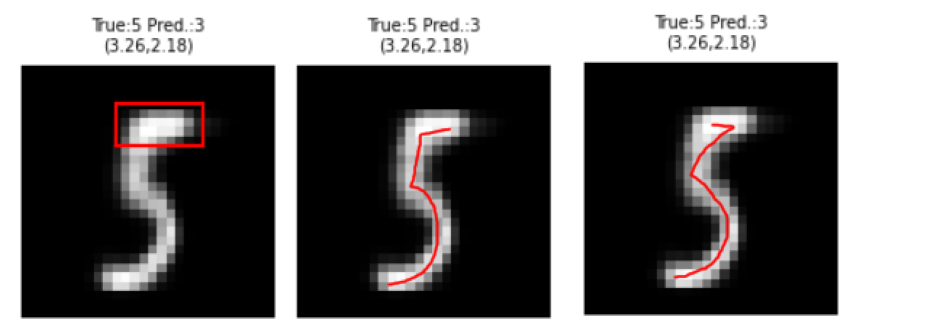

In [23]:
#3.6.3 True 5 Predicted 3 (2)
image = plt.imread("rlly-last.png")
plt.figure(figsize=(12,12))  # width x height in inches
plt.imshow(image)
plt.axis('off')
plt.show()

in #3.8 zie je een andere interessante waarneming, namelijk dat het getal 5 een uitschieter heeft linksboven op coordinaat (-4.09, 1.57). Als je kijkt in Codeblock #3.9, dan kun je zien dat deze 5 ook inderdaad lijkt op een 6. Het zou dus kunnen dat deze vijf meer naar linksboven staat dan andere vijven omdat deze een beetje op een 6 lijkt. Maar je moet niet vergeten dat dit een PCA is waarbij we 144 dimensies naar 2 dimensies hebben ge-reduced. dus durf ik dit niet met zekerheid te zeggen

In [ ]:
#3.7 PCA voor visualisatie test set
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# terug van 144d naar 2d voor plot
pca = PCA(n_components=2)
pca.fit(z_test)
z_test_2d = pca.transform(z_test)

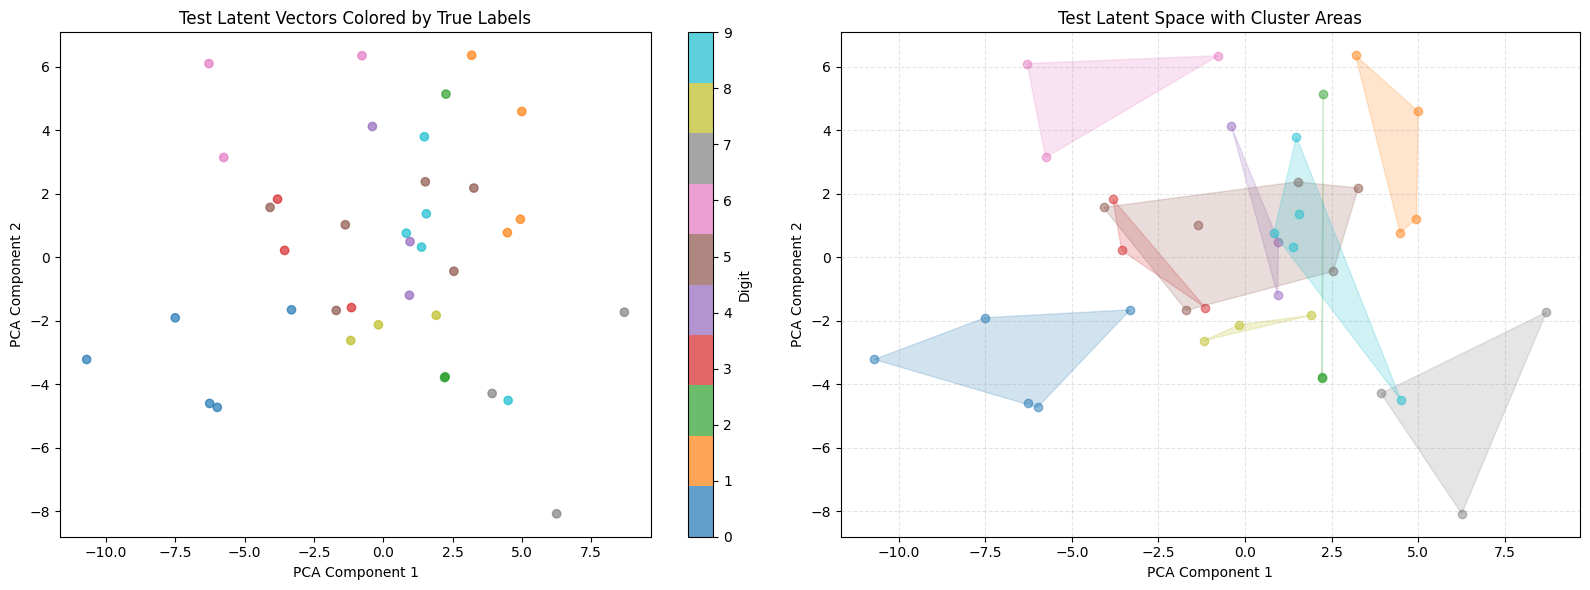

In [ ]:
#3.8 Plot Test latent space met PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

classes = np.unique(y_test)
colors = plt.cm.tab10(np.arange(len(classes)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))  # 1 row, 2 columns

# ------------------- Left plot: simple scatter -------------------
scatter1 = ax1.scatter(
    z_test_2d[:,0], z_test_2d[:,1],
    c=y_test, cmap='tab10', alpha=0.7
)
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_title('Test Latent Vectors Colored by True Labels')
cbar1 = plt.colorbar(scatter1, ax=ax1, ticks=range(len(classes)))
cbar1.set_label('Digit')

# ------------------- Right plot: scatter + convex hulls -------------------
for i, cls in enumerate(classes):
    points = z_test_2d[y_test == cls]
    ax2.scatter(
        points[:,0], points[:,1],
        color=colors[i], alpha=0.5, label=f"Digit {cls}"
    )
    
    # Draw convex hull
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]
        ax2.fill(
            hull_points[:,0], hull_points[:,1],
            color=colors[i], alpha=0.2
        )

ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_title('Test Latent Space with Cluster Areas')
ax2.grid(True, linestyle='--', color='gray', alpha=0.2)
plt.tight_layout()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


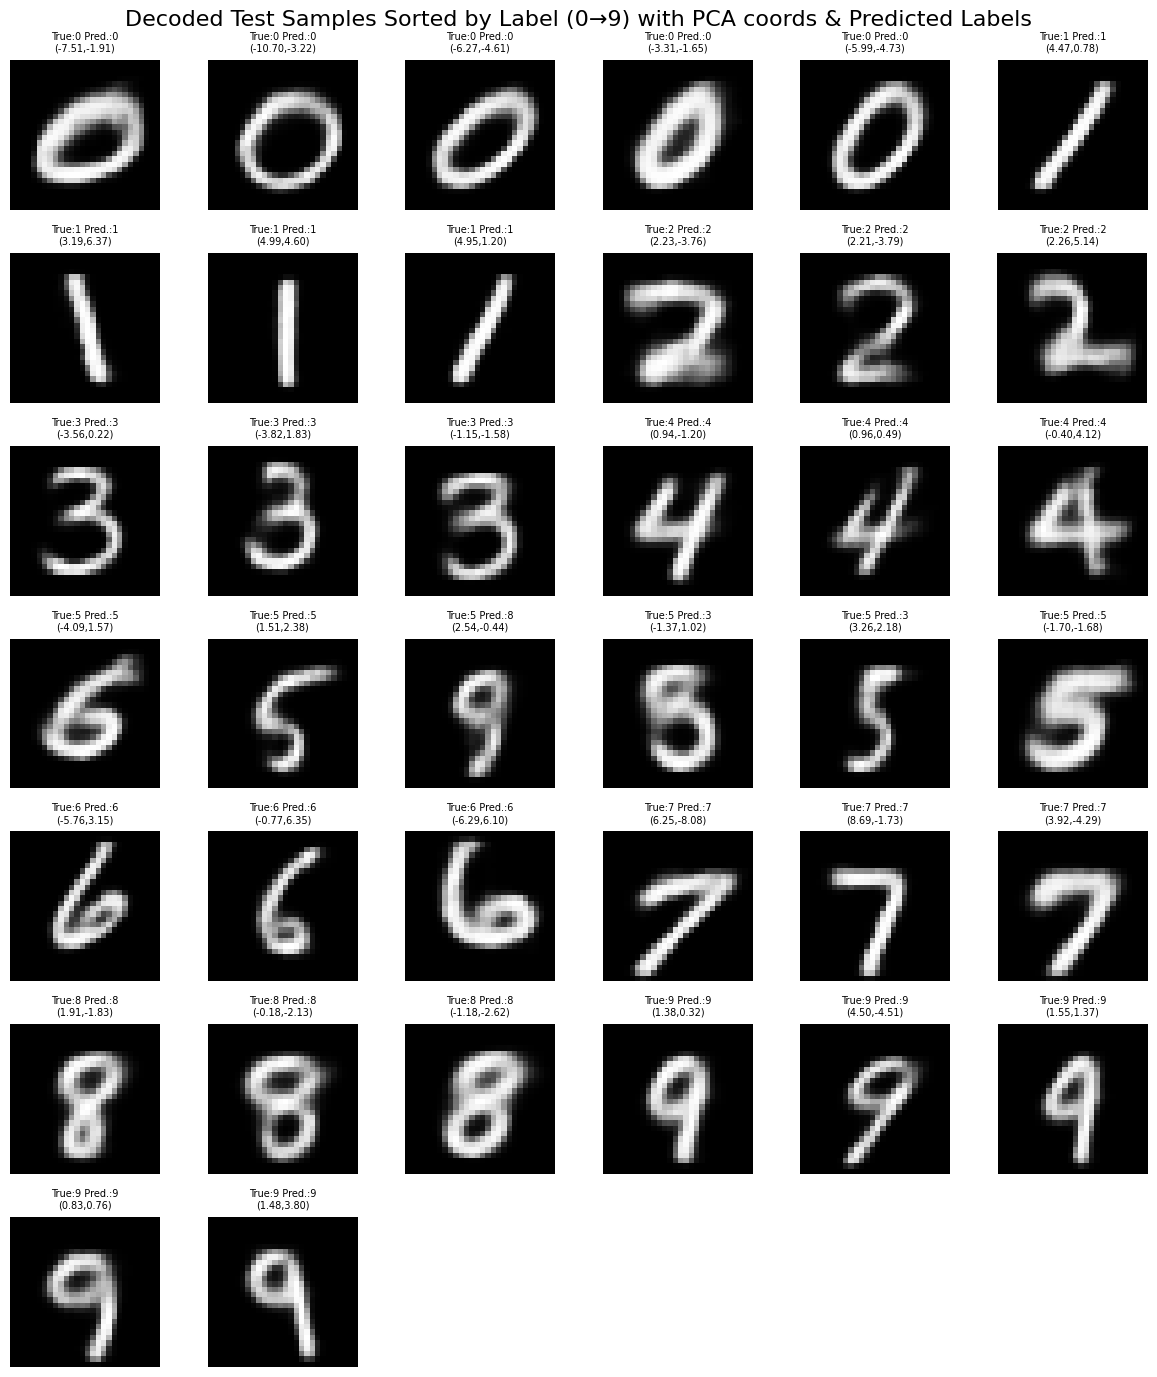

In [ ]:
#3.9 mnist data decoden en plotten met PCA coords en predicted labels
import matplotlib.pyplot as plt
import numpy as np

per_row = 6  # images per row

# Step 1: sort indices by true label
sorted_indices = np.argsort(y_test)

n = len(sorted_indices)
rows = int(np.ceil(n / per_row))

plt.figure(figsize=(per_row*2, rows*2))

# Step 2: get predicted labels
y_pred_probs = classifier_100.predict(z_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

for i, idx in enumerate(sorted_indices):
    z = z_test[idx]
    pca_x, pca_y = z_test_2d[idx]
    true_label = y_test[idx]
    pred_label = y_pred_labels[idx]

    x_recon = vae.decoder.predict(z[np.newaxis, :], verbose=0)

    plt.subplot(rows, per_row, i+1)
    plt.imshow(x_recon[0].squeeze(), cmap='gray')
    # Title shows True / Predicted / PCA coords
    plt.title(f"True:{true_label} Pred.:{pred_label}\n({pca_x:.2f},{pca_y:.2f})", fontsize=7)
    plt.axis('off')

plt.suptitle("Decoded Test Samples Sorted by Label (0→9) with PCA coords & Predicted Labels", fontsize=16)
plt.tight_layout()
plt.show()


# Bronnenlijst

Ik heb ook informatie uit de lessen en een teams-chat gebruikt maar het leek me niet correct om ze daadwerkelijk als bronnen toe te voegen. Uiteindelijk heb ik in deze opdracht eigenlijk alleen maar voordehand liggende dingen gedaan (en extreem hoge resultaten behaald), zelfs de grid search zou na mijn mening geen bron nodig moeten hebben maar ik heb hem er toch maar bijgezet.

- [1] L. Bonheme and M. Grzes, "FONDUE: An Algorithm to Find the Optimal Dimensionality of the Latent Representations of Variational Autoencoders," School of Computing, University of Kent, Canterbury, UK, 2026. Available: {lb732, m.grzes}@kent.ac.uk